In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel("/content/Telco-Customer-Churn.xlsx")

df.shape

(7043, 21)

**We have 21 Attrubutes and 7043 data objects**

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Description of Columns**

****
**Independent Variable**

customerID – Unique customer identifier.

gender – Customer’s gender (Male/Female).

SeniorCitizen – Whether the customer is a senior citizen (0 = No, 1 = Yes).

Partner – Whether the customer has a spouse/partner.

Dependents – Whether the customer has dependents (children, etc.).

tenure – Number of months the customer has stayed.

PhoneService – Whether the customer has phone service.

MultipleLines – Whether the customer has multiple phone lines.

InternetService – Type of internet service (DSL, Fiber optic, None).

OnlineSecurity – Whether customer has online security add-on.

OnlineBackup – Whether customer has online backup add-on.

DeviceProtection – Whether customer has device protection add-on.

TechSupport – Whether customer has tech support add-on.

StreamingTV – Whether customer uses streaming TV service.

StreamingMovies – Whether customer uses streaming movie service.

Contract – Customer’s contract type (monthly, yearly, two-year).

PaperlessBilling – Whether customer uses paperless billing.

PaymentMethod – Method of payment (check, card, bank transfer).

MonthlyCharges – Amount charged to customer monthly.

TotalCharges – Total charges paid by customer to date.
****

**Dependent Variable**

Churn – Whether the customer has left the company.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 



1. **We have total 21 Attributes in which 1 float , 2 int and 18 object dtype**

2. **Total Charges is showing as "Object" dtype but it is Numerical dtype. So We check why it is so**

# Charcterstics of Attrubutes

**Nominal**
- customerID
- gender
- Senior Citizen
- Partner
- Dependent
- Phone service
- Multiple Lines
- Internet Services
- Onlinen Securtiy
- Device Protection
- Tech Support
- Streaming TV
- Streaming Movies
- Paper billing
- Payment Method
- Churn

**Ordinal**
- Contract

**Numeric**
- Tenure
- Monthly Charges
- Total Charges

In [5]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


1. **There is no null values in dataset.**

In [6]:
df["TotalCharges"].value_counts()

,count
TotalCharges,
,11
20.2,11
19.75,9
20.05,8
19.9,8
...,...
130.15,1
3211.9,1
7843.55,1


1. **We found that there are white spaces in "Total Charges" Attribute that's why it is showing dtype as "Object" So we remove it**

In [7]:
# Prepare data: Convert TotalCharges to numeric and handle missing values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(subset=['TotalCharges'], inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

1. **Now, We have 2 float, 2 int , and 17 object dtype in our dataset**

In [9]:
cat_col = df.select_dtypes(include="object").columns
num_col = df.select_dtypes(include=["int","float"]).columns

1. Created set of columns that are numeric or categorical.

In [10]:
print("Unique values in columns")

for i in cat_col[1:]:
  print(f"{i}: {df[i].unique()}")

Unique values in columns
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


1. For each of categorical attribute checked what are the unique values are.

In [11]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [12]:
stats_data = {"Mean": [],
              "Median": [],
              "Mode": [],
              "Range": [],
              "IQR": [],
              "Variance": [],
              "Std deviaton": [],
              "Skewness": [],
              "Kurtosis": []}

for i in num_col[1:]:
    mean = df[i].mean()
    median = df[i].median()
    stdev = df[i].std()
    var = df[i].var()
    min_val = df[i].min()
    max_val = df[i].max()
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    mode = df[i].mode()[0] if not df[i].mode().empty else np.nan
    iqr = q3 - q1
    rng = max_val - min_val
    skew = df[i].skew()
    kurt = df[i].kurt()

    stats_data["Mean"].append(mean)
    stats_data["Median"].append(median)
    stats_data["Mode"].append(mode)
    stats_data["Range"].append(rng)
    stats_data["IQR"].append(iqr)
    stats_data["Variance"].append(var)
    stats_data["Std deviaton"].append(stdev)
    stats_data["Skewness"].append(skew)
    stats_data["Kurtosis"].append(kurt)

df_stats_data = pd.DataFrame(stats_data, index=num_col[1:]).astype(float).round(3)
df_stats_data.T


,tenure,MonthlyCharges,TotalCharges
Mean,32.422,64.798,2283.300
Median,29.000,70.350,1397.475
Mode,1.000,20.050,20.200
Range,71.000,100.500,8666.000
IQR,46.000,54.275,3393.288
Variance,602.470,905.166,5138252.407
Std deviaton,24.545,30.086,2266.771
Skewness,0.238,-0.222,0.962
Kurtosis,-1.388,-1.256,-0.232


**Description of Attributes**

1. **tenure**

Mean = 32.4 months → On average, customers stay ~2.7 years.

Median = 29 months → Half of the customers stay less than 29 months.

Mode = 1 month → Most frequent tenure is very short, many customers churn early.

Range = 71 months → Stays vary widely (1 to 72 months).

IQR = 46 months → Middle 50% of customers stay between 8–54 months.

Variance/Std Dev = 602.47 / 24.55 → High spread in customer tenures.

Skewness = 0.238 → Slight right skew (more long-stay customers).

Kurtosis = -1.388 → Flatter distribution (light tails).
****

2. **MonthlyCharges**

Mean = 64.8  → Average monthly bill is around 65.

Median = 70.35  → Half pay below 70.35, half above.

Mode = 20.05  → Most common bill is very low (~20).

Range = 100.5  → Customers are billed between ~20 and ~120 monthly.

IQR = 54.28  → Middle 50% pay between ~$45 and ~$99.

Variance/Std Dev = 905.17 / 30.09 → Large variation in billing.

Skewness = -0.222 → Slight left skew (some very high charges).

Kurtosis = -1.256 → Flatter distribution than normal.
****

3. **TotalCharges**

Mean = 2283.3  → On average, customers have paid ~2283.

Median = 1397.5  → Half paid less than ~1400.

Mode = 20.2  → Many customers only paid initial small bills.

Range = 8666  → Customers paid between ~20 and ~8686 in total.

IQR = 3393.29 → Middle 50% paid between ~700 and ~4100.

Variance/Std Dev = 5.13M / 2266.77 → Very high spread due to tenure differences.

Skewness = 0.962 → Strong right skew (a few customers have paid very high totals).

Kurtosis = -0.232 → Slightly flatter than normal, but close to normal.

Text(0.5, 1.0, 'Box Plot of TotalCharges')

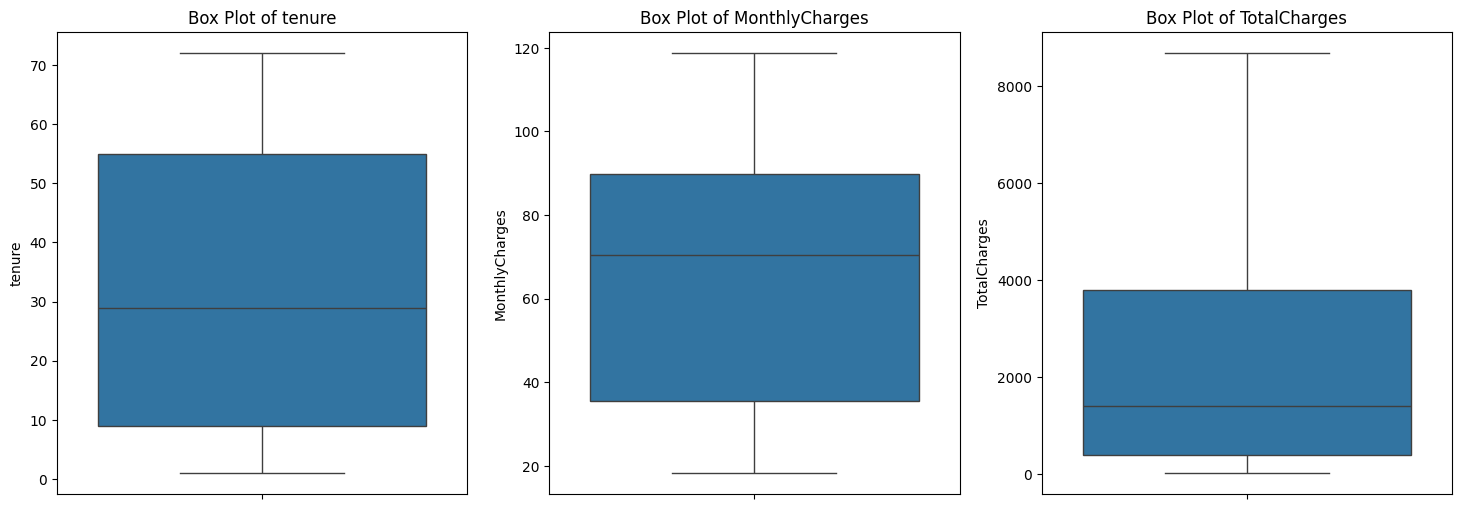

In [13]:
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
sns.boxplot(df["tenure"])
plt.title(f"Box Plot of tenure")

plt.subplot(1,3,2)
sns.boxplot(df["MonthlyCharges"])
plt.title(f"Box Plot of MonthlyCharges")

plt.subplot(1,3,3)
sns.boxplot(df["TotalCharges"])
plt.title(f"Box Plot of TotalCharges")

1. **Tenure**  
   - The median tenure is around **29 months**, but the spread is wide.  
   - Many customers leave within the first few months (some even after just 1 month), while others stay as long as **6 years**.  
   - This shows that churn is common among new customers, but there’s also a loyal group who stick around for years.

2. **MonthlyCharges**  
   - The median monthly bill is around 70.  
   - Half of the customers pay between **~35 and ~90**.  
   - Charges range from **20 (low plans)** up to about **120 (premium plans)**.  
   - The distribution looks fairly balanced, with no extreme outliers — meaning customers are spread across all types of plans.

3. **TotalCharges**  
   - The median is about **1400**, but the spread is huge.  
   - Most customers fall in the **~400 to ~3800** range, but a few long-term high-paying customers go beyond **8000**.  
   - The data is **right-skewed** — meaning many customers have relatively low totals (due to short tenure), while a smaller group contributes disproportionately high revenue.


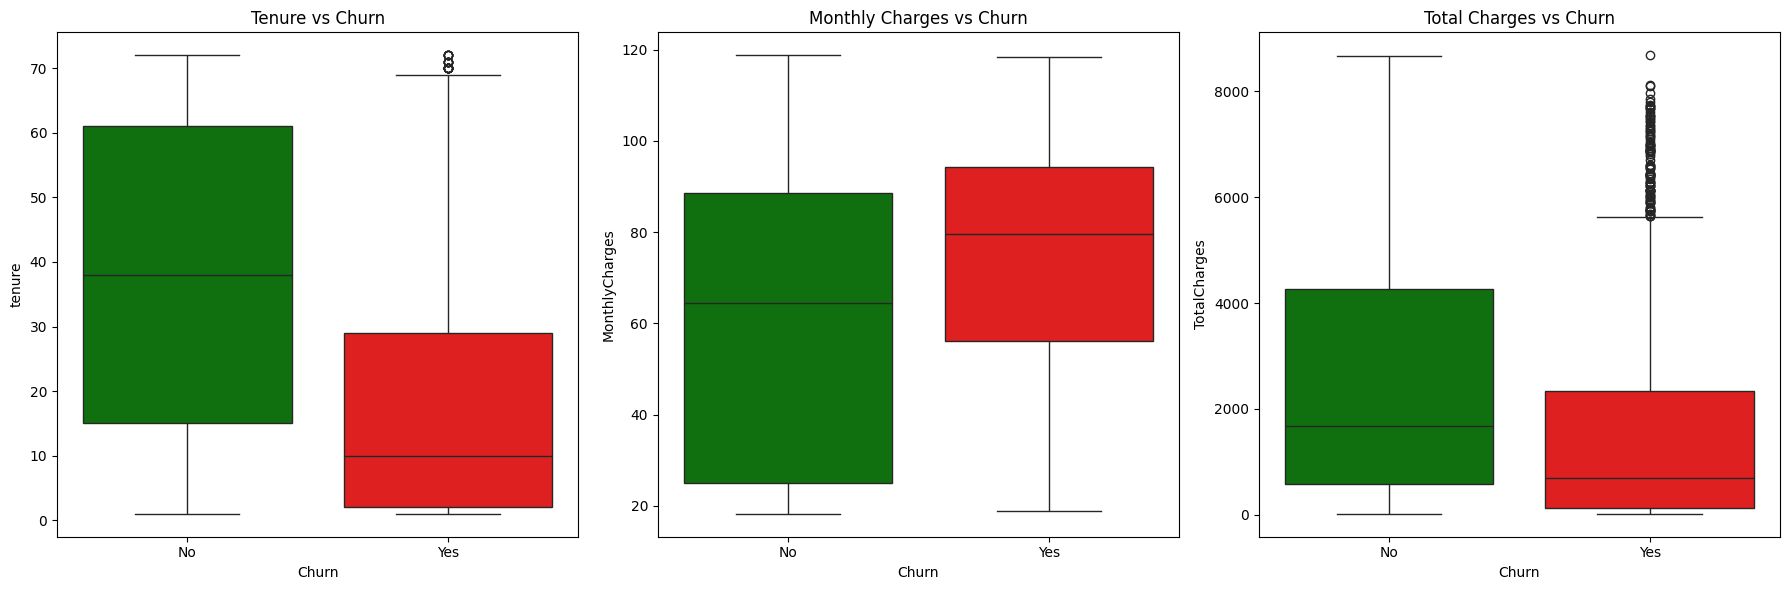

In [14]:
plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
sns.boxplot(data=df, x="Churn", y="tenure", palette={"Yes":"red", "No":"green"})
plt.title("Tenure vs Churn")

plt.subplot(1,3,2)
sns.boxplot(data=df, x="Churn", y="MonthlyCharges", palette={"Yes":"red", "No":"green"})
plt.title("Monthly Charges vs Churn")

plt.subplot(1,3,3)
sns.boxplot(data=df, x="Churn", y="TotalCharges", palette={"Yes":"red", "No":"green"})
plt.title("Total Charges vs Churn")

plt.tight_layout()
plt.show()


1. **Tenure vs Churn**

- Customers who churned (red) generally have shorter tenure (they leave early).

- Non-churned customers (green) tend to stay much longer, with median tenure far higher.

- Suggests that loyal, long-term customers are less likely to churn.
***

2. **Monthly Charges vs Churn**

- Churned customers (red) usually face higher monthly charges compared to non-churned ones.

- Non-churned customers are more concentrated around lower to mid charges.

- Indicates that higher monthly bills may drive customers to leave.
***

3. **Total Charges vs Churn**

- Non-churned customers (green) accumulate much higher total charges since they stay longer.

- Churned customers (red) show lower total charges (because they leave early, despite paying higher monthly fees).

- Retaining customers increases lifetime value significantly.

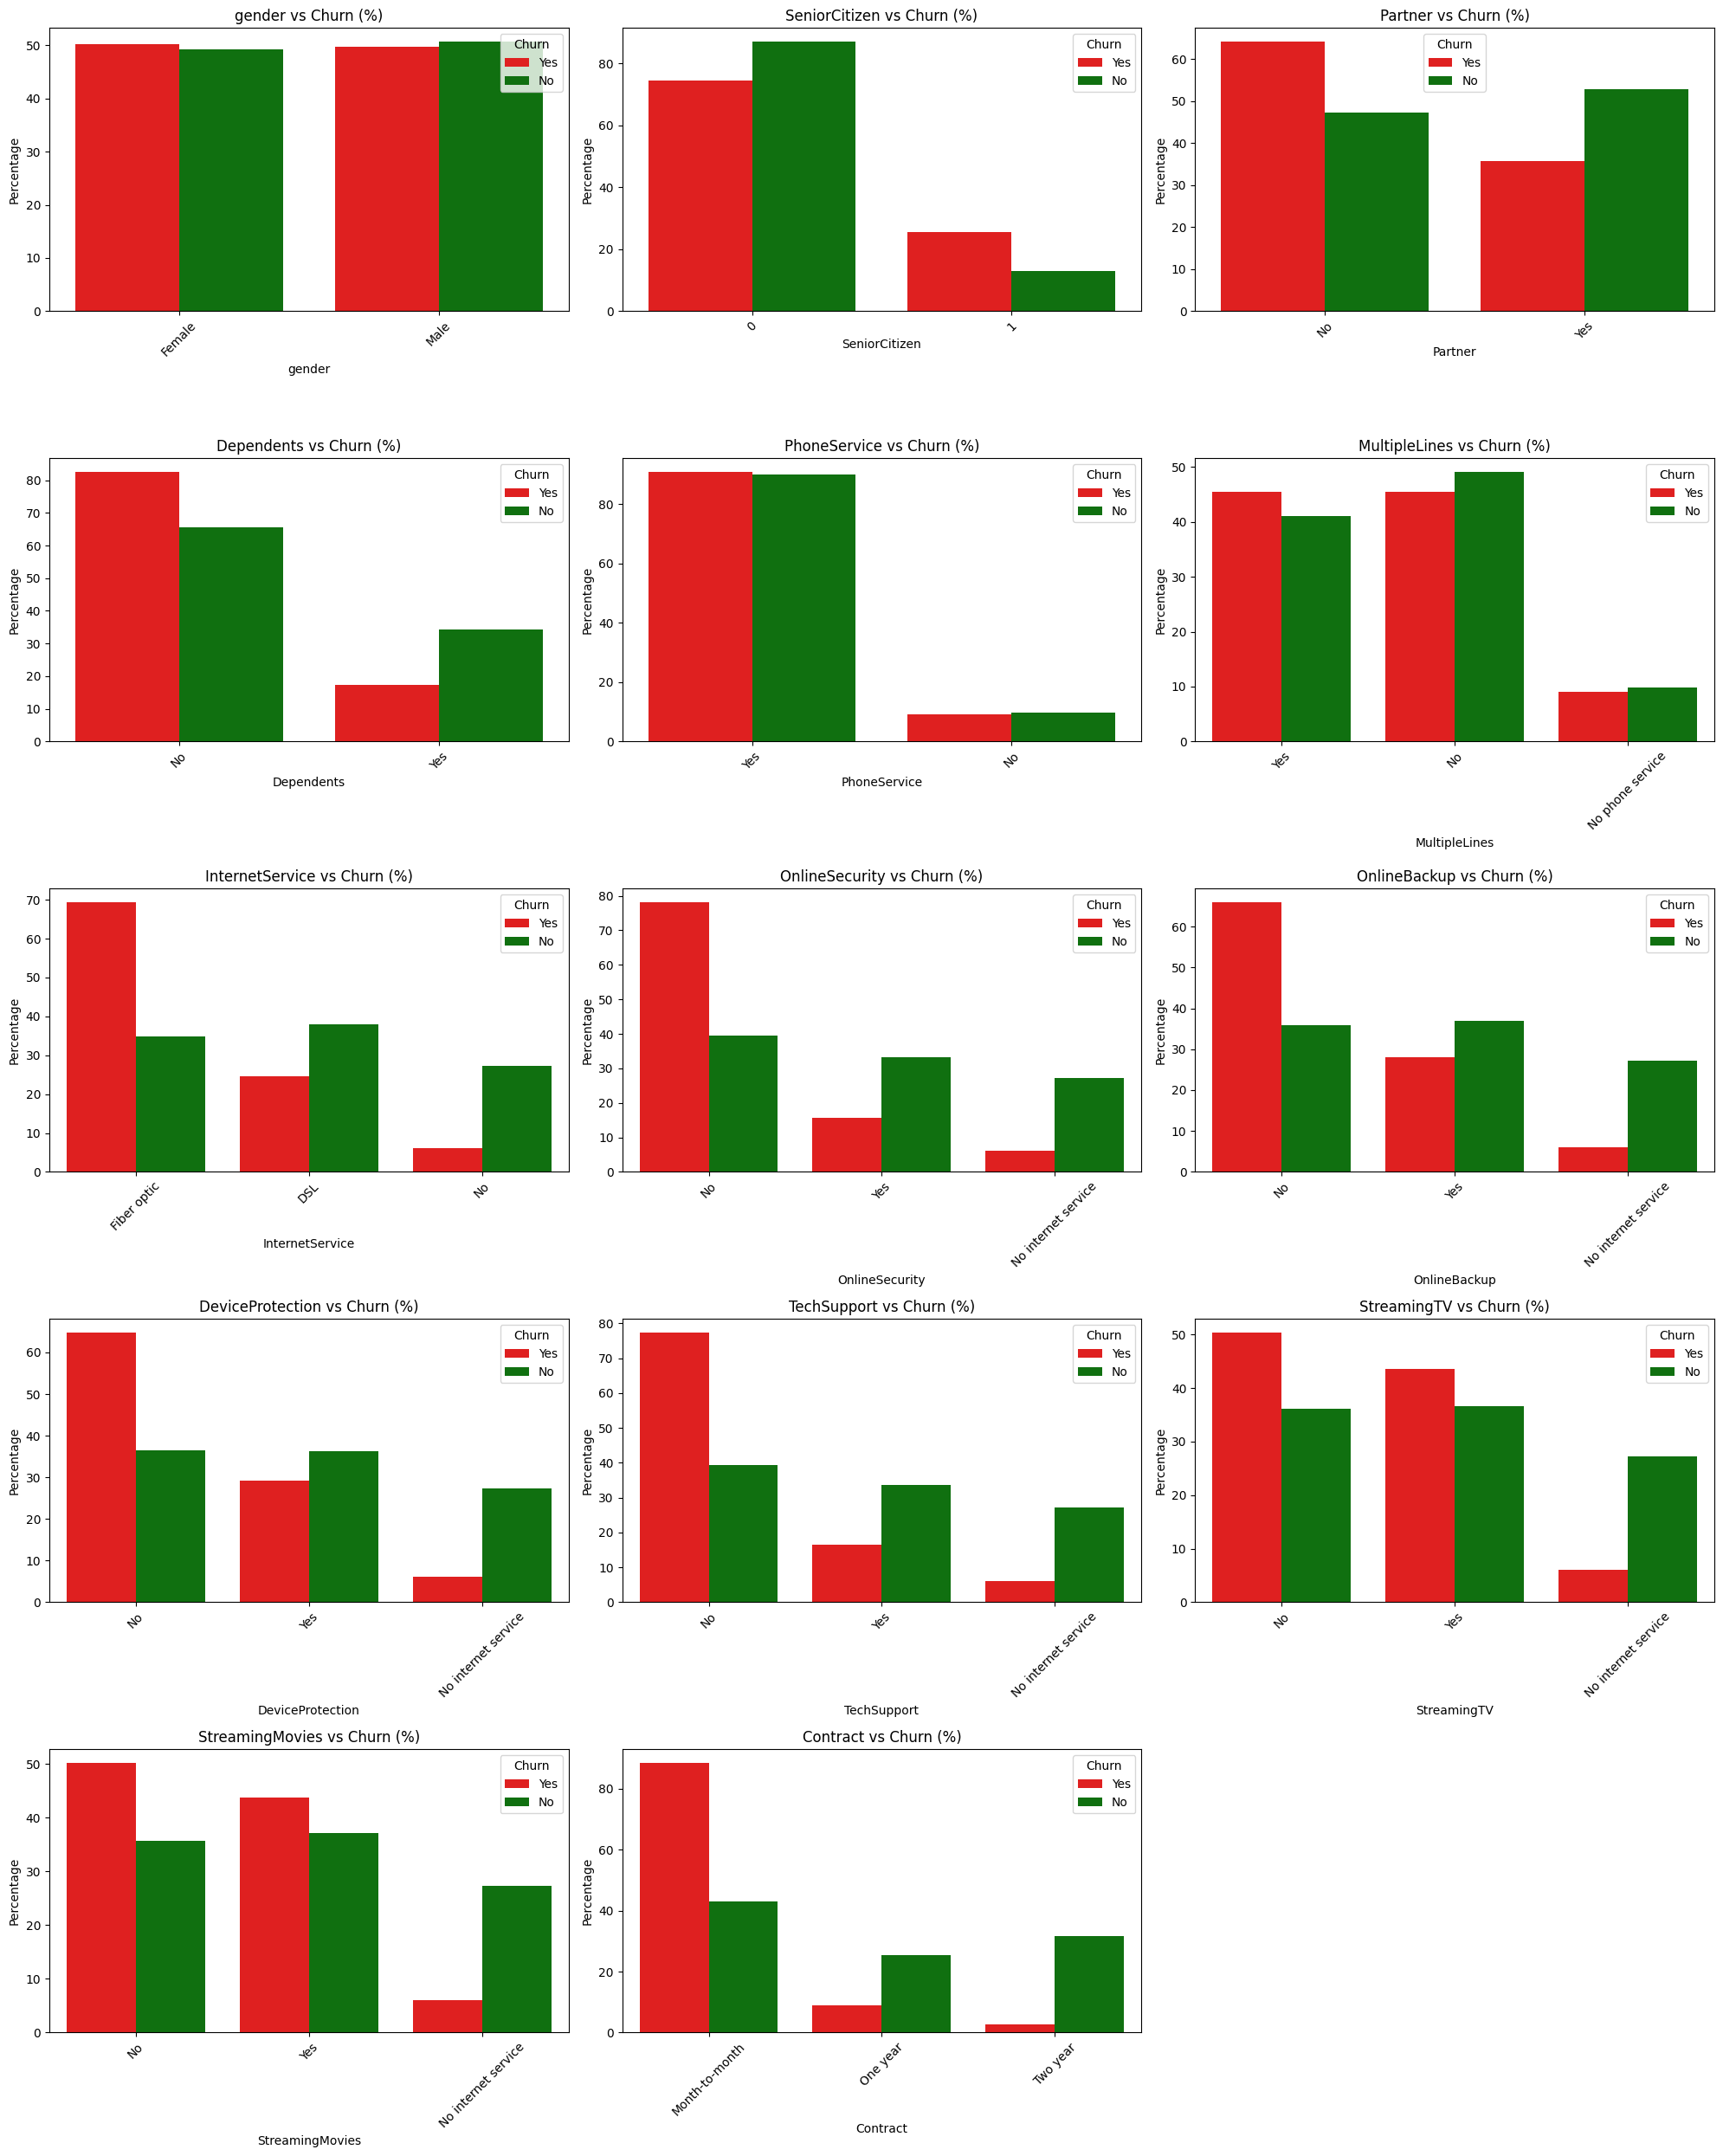

In [17]:

cat_cols = [col for col in df.columns[:16]
            if col not in num_col[1:] and col != "customerID"]

n = len(cat_cols)
rows = (n + 2) // 3   # arrange in 3 per row

plt.figure(figsize=(20, 5*rows))

for i, col in enumerate(cat_cols, 1):
    # Prepare data
    churn_yes = (
        df[df["Churn"]=="Yes"][col]
        .value_counts(normalize=True) * 100
    ).reset_index()
    churn_yes.columns = [col, "percentage"]
    churn_yes["Churn"] = "Yes"

    churn_no = (
        df[df["Churn"]=="No"][col]
        .value_counts(normalize=True) * 100
    ).reset_index()
    churn_no.columns = [col, "percentage"]
    churn_no["Churn"] = "No"

    churn_df = pd.concat([churn_yes, churn_no])

    # Subplot
    plt.subplot(rows, 3, i)
    sns.barplot(
        x=col,
        y="percentage",
        hue="Churn",
        data=churn_df,
        palette={"Yes":"red", "No":"green"}
    )
    plt.title(f"{col} vs Churn (%)")
    plt.ylabel("Percentage")
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.legend(title="Churn")

plt.tight_layout()
plt.show()


### 1. Demographic Features
- **Gender**: No major difference in churn between male and female customers.
- **Senior Citizen**: Senior citizens have a much higher churn rate compared to non-seniors.

### 2. Family & Dependents
- **Partner**: Customers without partners are more likely to churn.
- **Dependents**: Customers without dependents churn significantly more.

### 3. Phone Services
- **Phone Service**: Having or not having phone service does not strongly affect churn.
- **Multiple Lines**: Customers with multiple lines show a slightly higher churn.

### 4. Internet Services & Add-ons
- **Internet Service**: Customers with **Fiber Optic** service churn the most.  
  DSL users churn less, and those without internet service have the lowest churn.
- **Online Security, Online Backup, Device Protection, Tech Support**:  
  Customers without these services churn much more.  
  Having these services reduces churn significantly.
- **Streaming TV & Movies**: Streaming services alone do not strongly reduce churn.

### 5. Contract & Tenure
- **Contract Type**:  
  - **Month-to-month** → very high churn.  
  - **One-year & Two-year** → much lower churn.

---

**Overall Insights**  
- High churn → Senior citizens, no dependents/partners, Fiber Optic internet users, month-to-month contracts, no add-on services.  
- Low churn → Long-term contracts, DSL internet, customers with dependents, and those using add-on services.



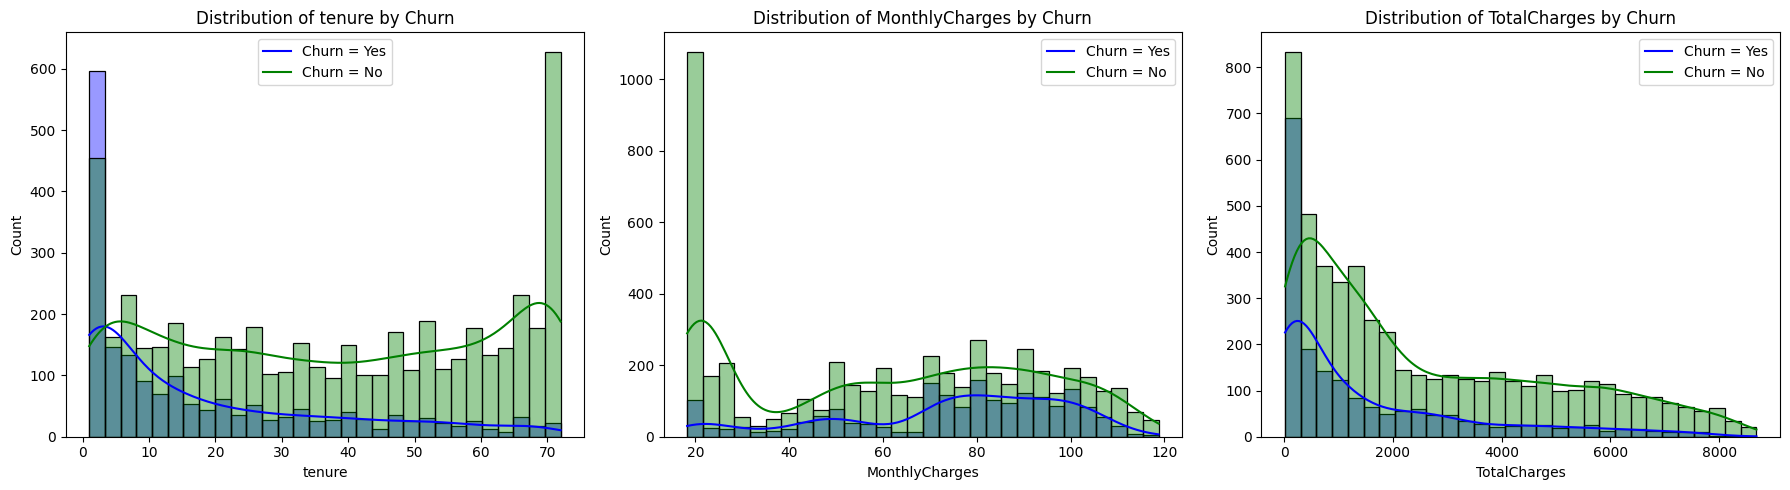

In [18]:
num_cols = [col for col in df.columns if df[col].dtype in ["int64", "float64"] and col not in ["SeniorCitizen"]]

plt.figure(figsize=(18, 5))

for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)  # 1 row, 3 columns, position i
    sns.histplot(
        data=df,
        x=col,
        hue="Churn",
        bins=30,
        kde=True,
        palette={"Yes": "blue", "No": "green"},
        alpha=0.4
    )
    plt.title(f"Distribution of {col} by Churn")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.legend(labels=["Churn = Yes", "Churn = No"])

plt.tight_layout()
plt.show()



### 1. Tenure
- Customers with **low tenure (new customers)** churn the most.  
- Long-tenure customers are much less likely to churn, showing that retention improves over time.  
- Loyalty plays a key role — customers who stay longer tend to remain.

### 2. Monthly Charges
- Churned customers are concentrated in the **higher monthly charges range** (70–110).  
- Non-churned customers are more evenly distributed but show strong peaks at lower charges.  
- Indicates that expensive plans may push customers to leave.

### 3. Total Charges
- Customers with **low total charges** (new or short-term customers) have much higher churn.  
- Non-churned customers are mostly in the higher total charges group, indicating **long-term customers tend to stay**.  
- Suggests that churn is heavily driven by new customers who haven’t built long-term value.

---

✅ **Key Takeaways**  
- New customers with short tenure and low total charges are at high risk of churn.  
- High monthly charges also increase churn likelihood.  
- Building loyalty programs and offering discounts for new/high-charge customers could reduce churn.

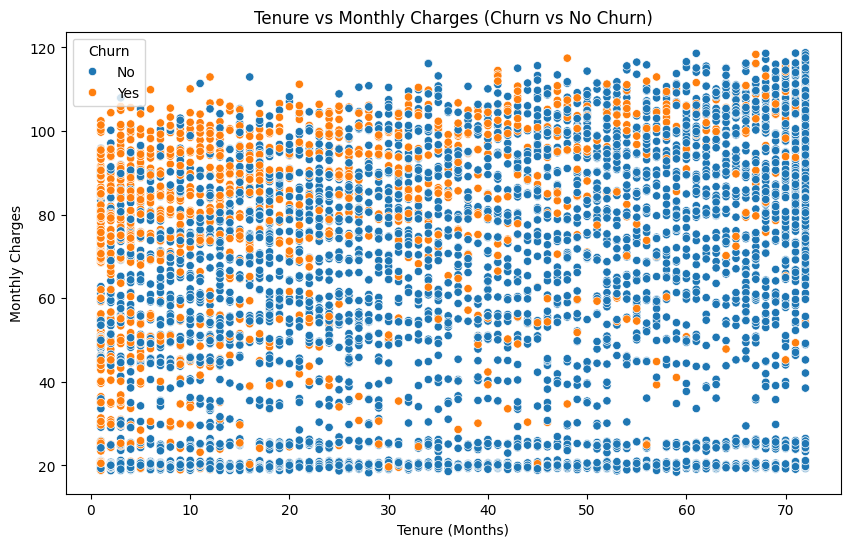

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="tenure", y="MonthlyCharges", hue="Churn", alpha=1)

plt.title("Tenure vs Monthly Charges (Churn vs No Churn)")
plt.xlabel("Tenure (Months)")
plt.ylabel("Monthly Charges")
plt.legend(title="Churn")
plt.show()

1. **The plot shows that churn is higher among customers with low tenure and high monthly charges. Customers with longer tenure are less likely to churn, regardless of their monthly charges. This indicates that early customer experience and pricing play a key role in churn.**

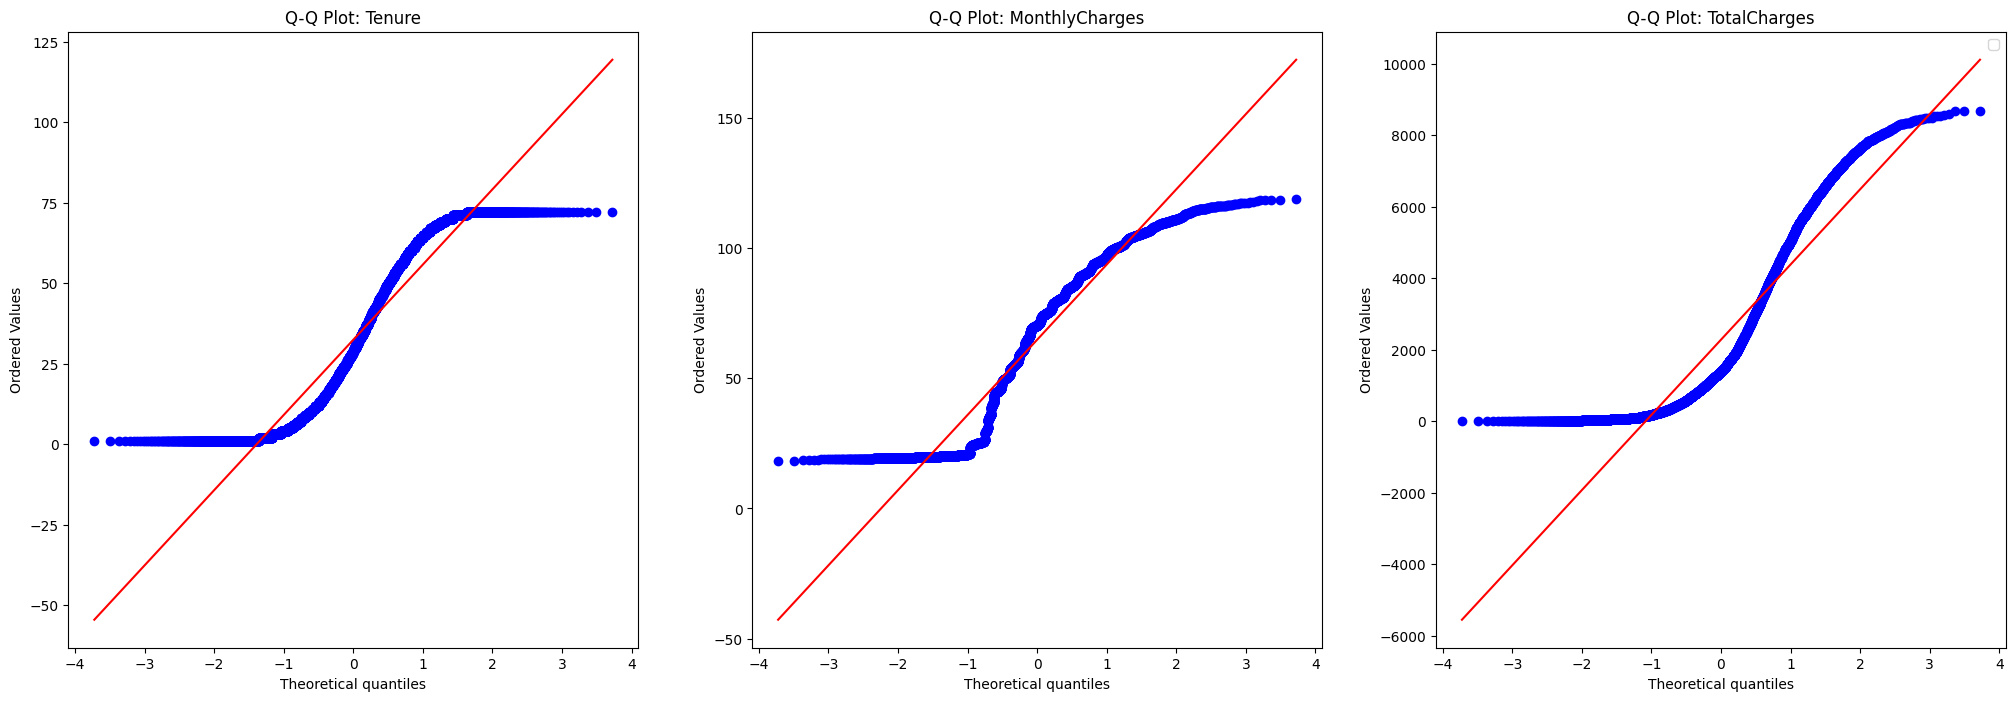

In [20]:
plt.figure(figsize=(25,8))
plt.subplot(131)
sts.probplot(df['tenure'], dist="norm", plot=plt)
plt.title("Q-Q Plot: Tenure")
plt.subplot(132)
sts.probplot(df['MonthlyCharges'], dist="norm", plot=plt)
plt.title("Q-Q Plot: MonthlyCharges")
plt.subplot(133)
sts.probplot(df['TotalCharges'], dist="norm", plot=plt)
plt.title("Q-Q Plot: TotalCharges")
plt.legend()
plt.show()

**Tenure**  
- The curve bends away from the straight red line at the bottom and top.  
- Tenure is not normally distributed: many customers are either very new (short tenure) or very loyal (long tenure).  
- This makes tenure look more “U-shaped” rather than a smooth bell curve.  

**Monthly Charges**  
- The points curve away from the line at both ends.  
- Most customers are on affordable plans, while only a few pay premium prices.  
- Monthly charges are not evenly spread, showing a skew towards lower values.  

**Total Charges**  
- The S-shape is stronger here.  
- Since TotalCharges = Tenure × MonthlyCharges, long-term customers naturally have higher totals.  
- It is not normally distributed: many new customers have low totals, while long-term ones accumulate very high totals.  


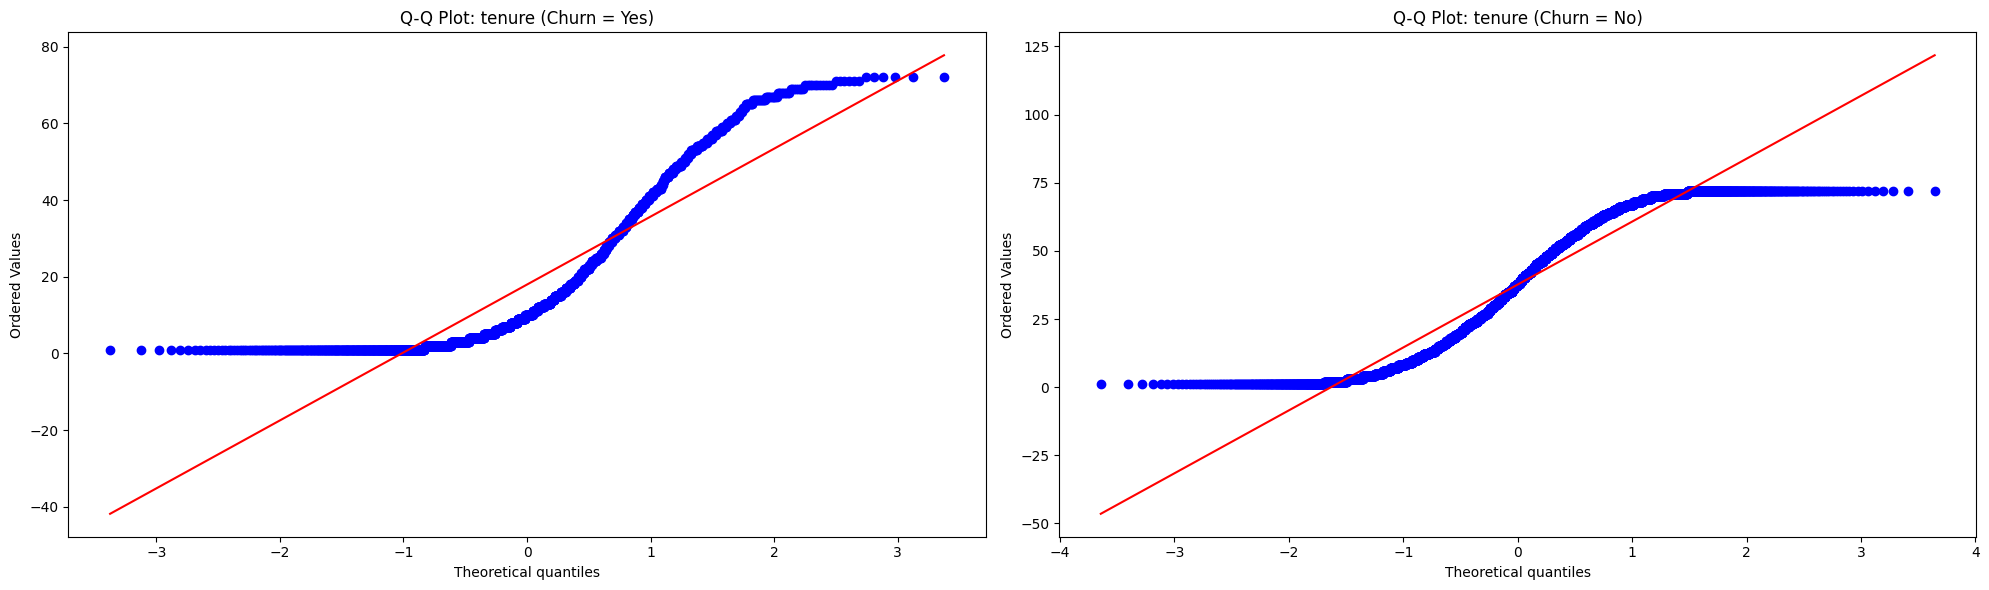

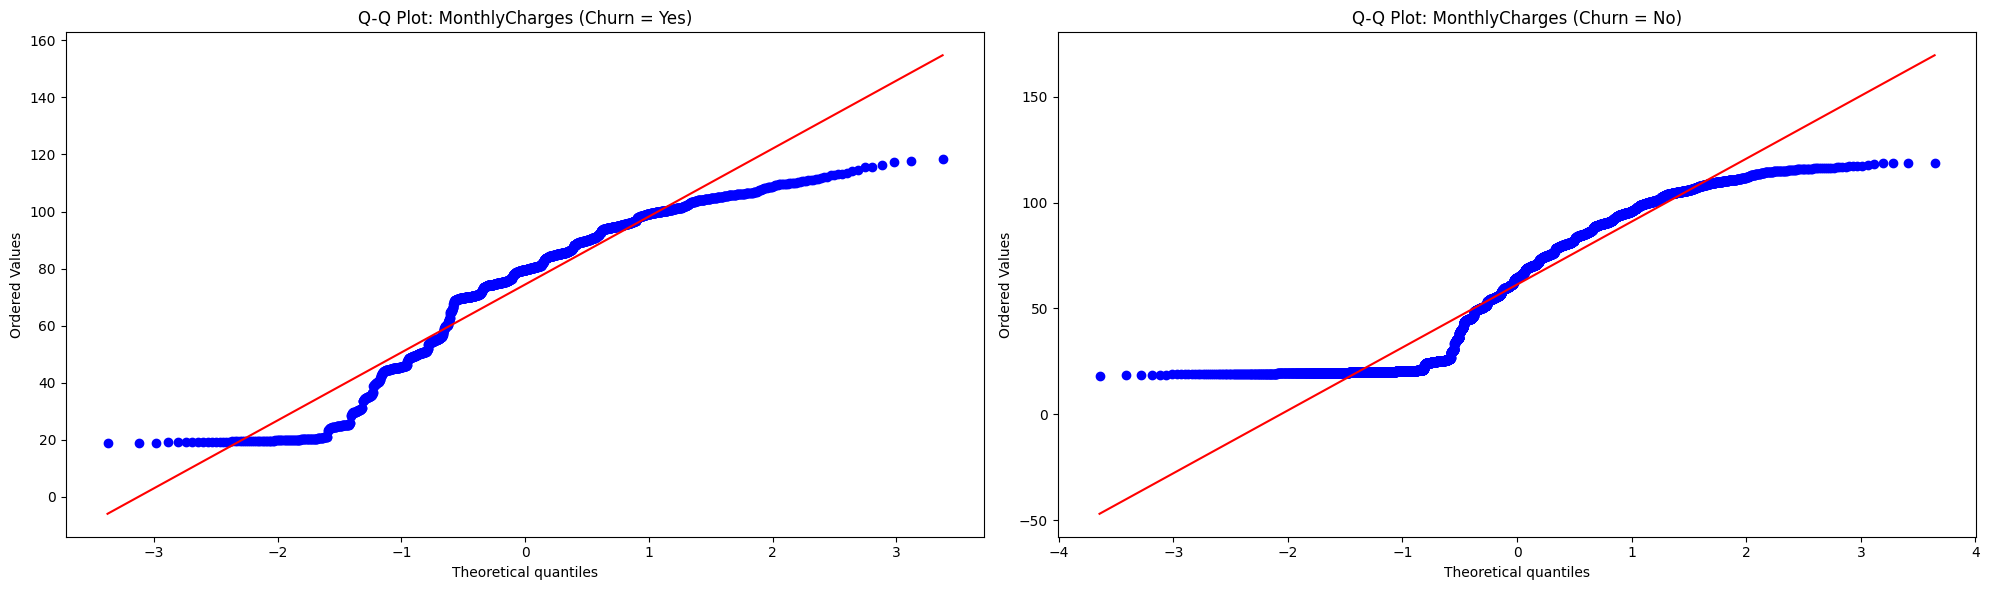

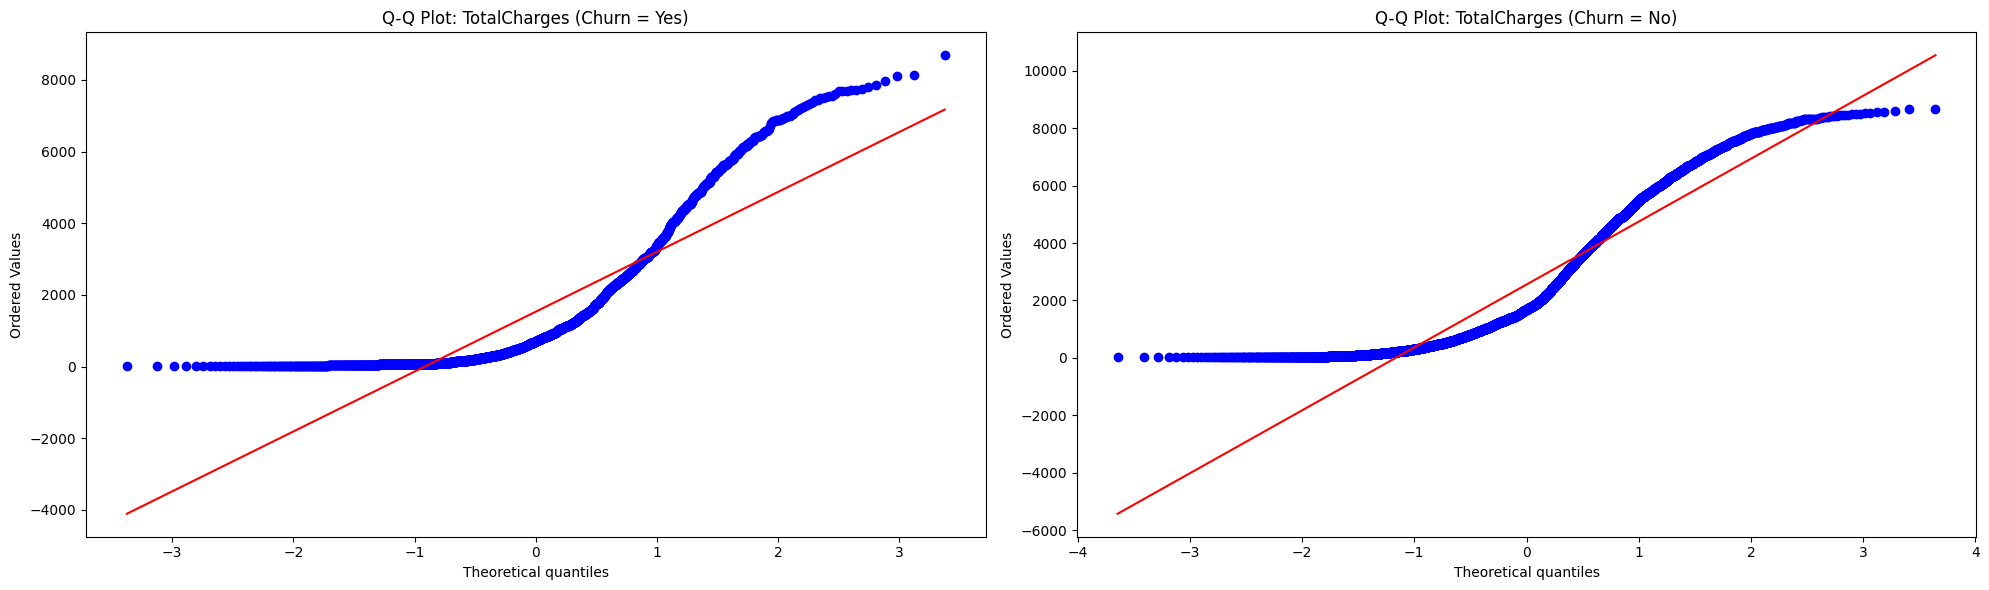

In [24]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in numerical_cols:

    plt.figure(figsize=(20, 6))


    plt.subplot(1, 2, 1)
    churn_yes_data = df[df['Churn'] == "Yes"][col].dropna()
    sts.probplot(churn_yes_data, dist="norm", plot=plt)
    plt.title(f"Q-Q Plot: {col} (Churn = Yes)")


    plt.subplot(1, 2, 2)
    churn_no_data = df[df['Churn'] == "No"][col].dropna()
    sts.probplot(churn_no_data, dist="norm", plot=plt)
    plt.title(f"Q-Q Plot: {col} (Churn = No)")
    plt.tight_layout()
    plt.show()

* Analysis of tenure
1. Q-Q Plot: tenure (Churn = Yes)

* The blue dots form a sharp curve far below the red line. This indicates a strong right-skewed distribution.
*  that means The tenure distribution for customers who churn is not normal. The vast majority of data points are concentrated at the very low end. This means that customers who decide to leave do so very early in their subscription period. There are very few instances of long-term customers churning.
2. Q-Q Plot: tenure (Churn = No)
* The plot forms the characteristic 'S' shape with flat sections at both the bottom and top ends.
* that means The tenure for loyal customers is also not normally distributed; it has light tails. This bimodal behavior shows two distinct groups of loyal customers: a large group of brand new customers (low tenure) and another large group of very long-term customers (high tenure), with fewer customers in the middle.

* Analysis of MonthlyCharges
1. Q-Q Plot: MonthlyCharges (Churn = Yes)
* The data points mostly fall below the red line, particularly in the middle range. This indicates a left-skewed distribution.
* The monthly charges for customers who churn are skewed towards higher values. This strongly suggests that customers paying higher monthly fees are more likely to churn. The cost of the service appears to be a significant factor in the decision to leave.
2. Q-Q Plot: MonthlyCharges (Churn = No)
* The plot shows a pronounced curve below the red line, with a very flat, horizontal section at the low end. This indicates a right-skewed distribution.
* The monthly charges for customers who stay are skewed towards lower values. There is a very large concentration of loyal customers on low-cost plans (as seen by the flat section where many customers share the same low monthly charge). This suggests that customers on more affordable plans are more likely to remain with the service.

* Analysis of TotalCharges
1. Q-Q Plot: TotalCharges (Churn = Yes)
* The plot shows an extreme curve far below the red line, indicating a very strong right-skewed distribution.
* that means The TotalCharges for churned customers are heavily concentrated at the low end. This is a direct consequence of their short tenure. Since they leave early, they do not have the time to accumulate significant total payments.
2. Q-Q Plot: TotalCharges (Churn = No)
* This plot also shows a right-skew, which is typical for financial data. However, the curve is much less pronounced compared to the churned group.
* While also right-skewed, the TotalCharges for loyal customers are much more spread out. This reflects the diverse mix of customers who stay—some are new with low total charges, while many are long-term customers who have accumulated very high total charges over time.

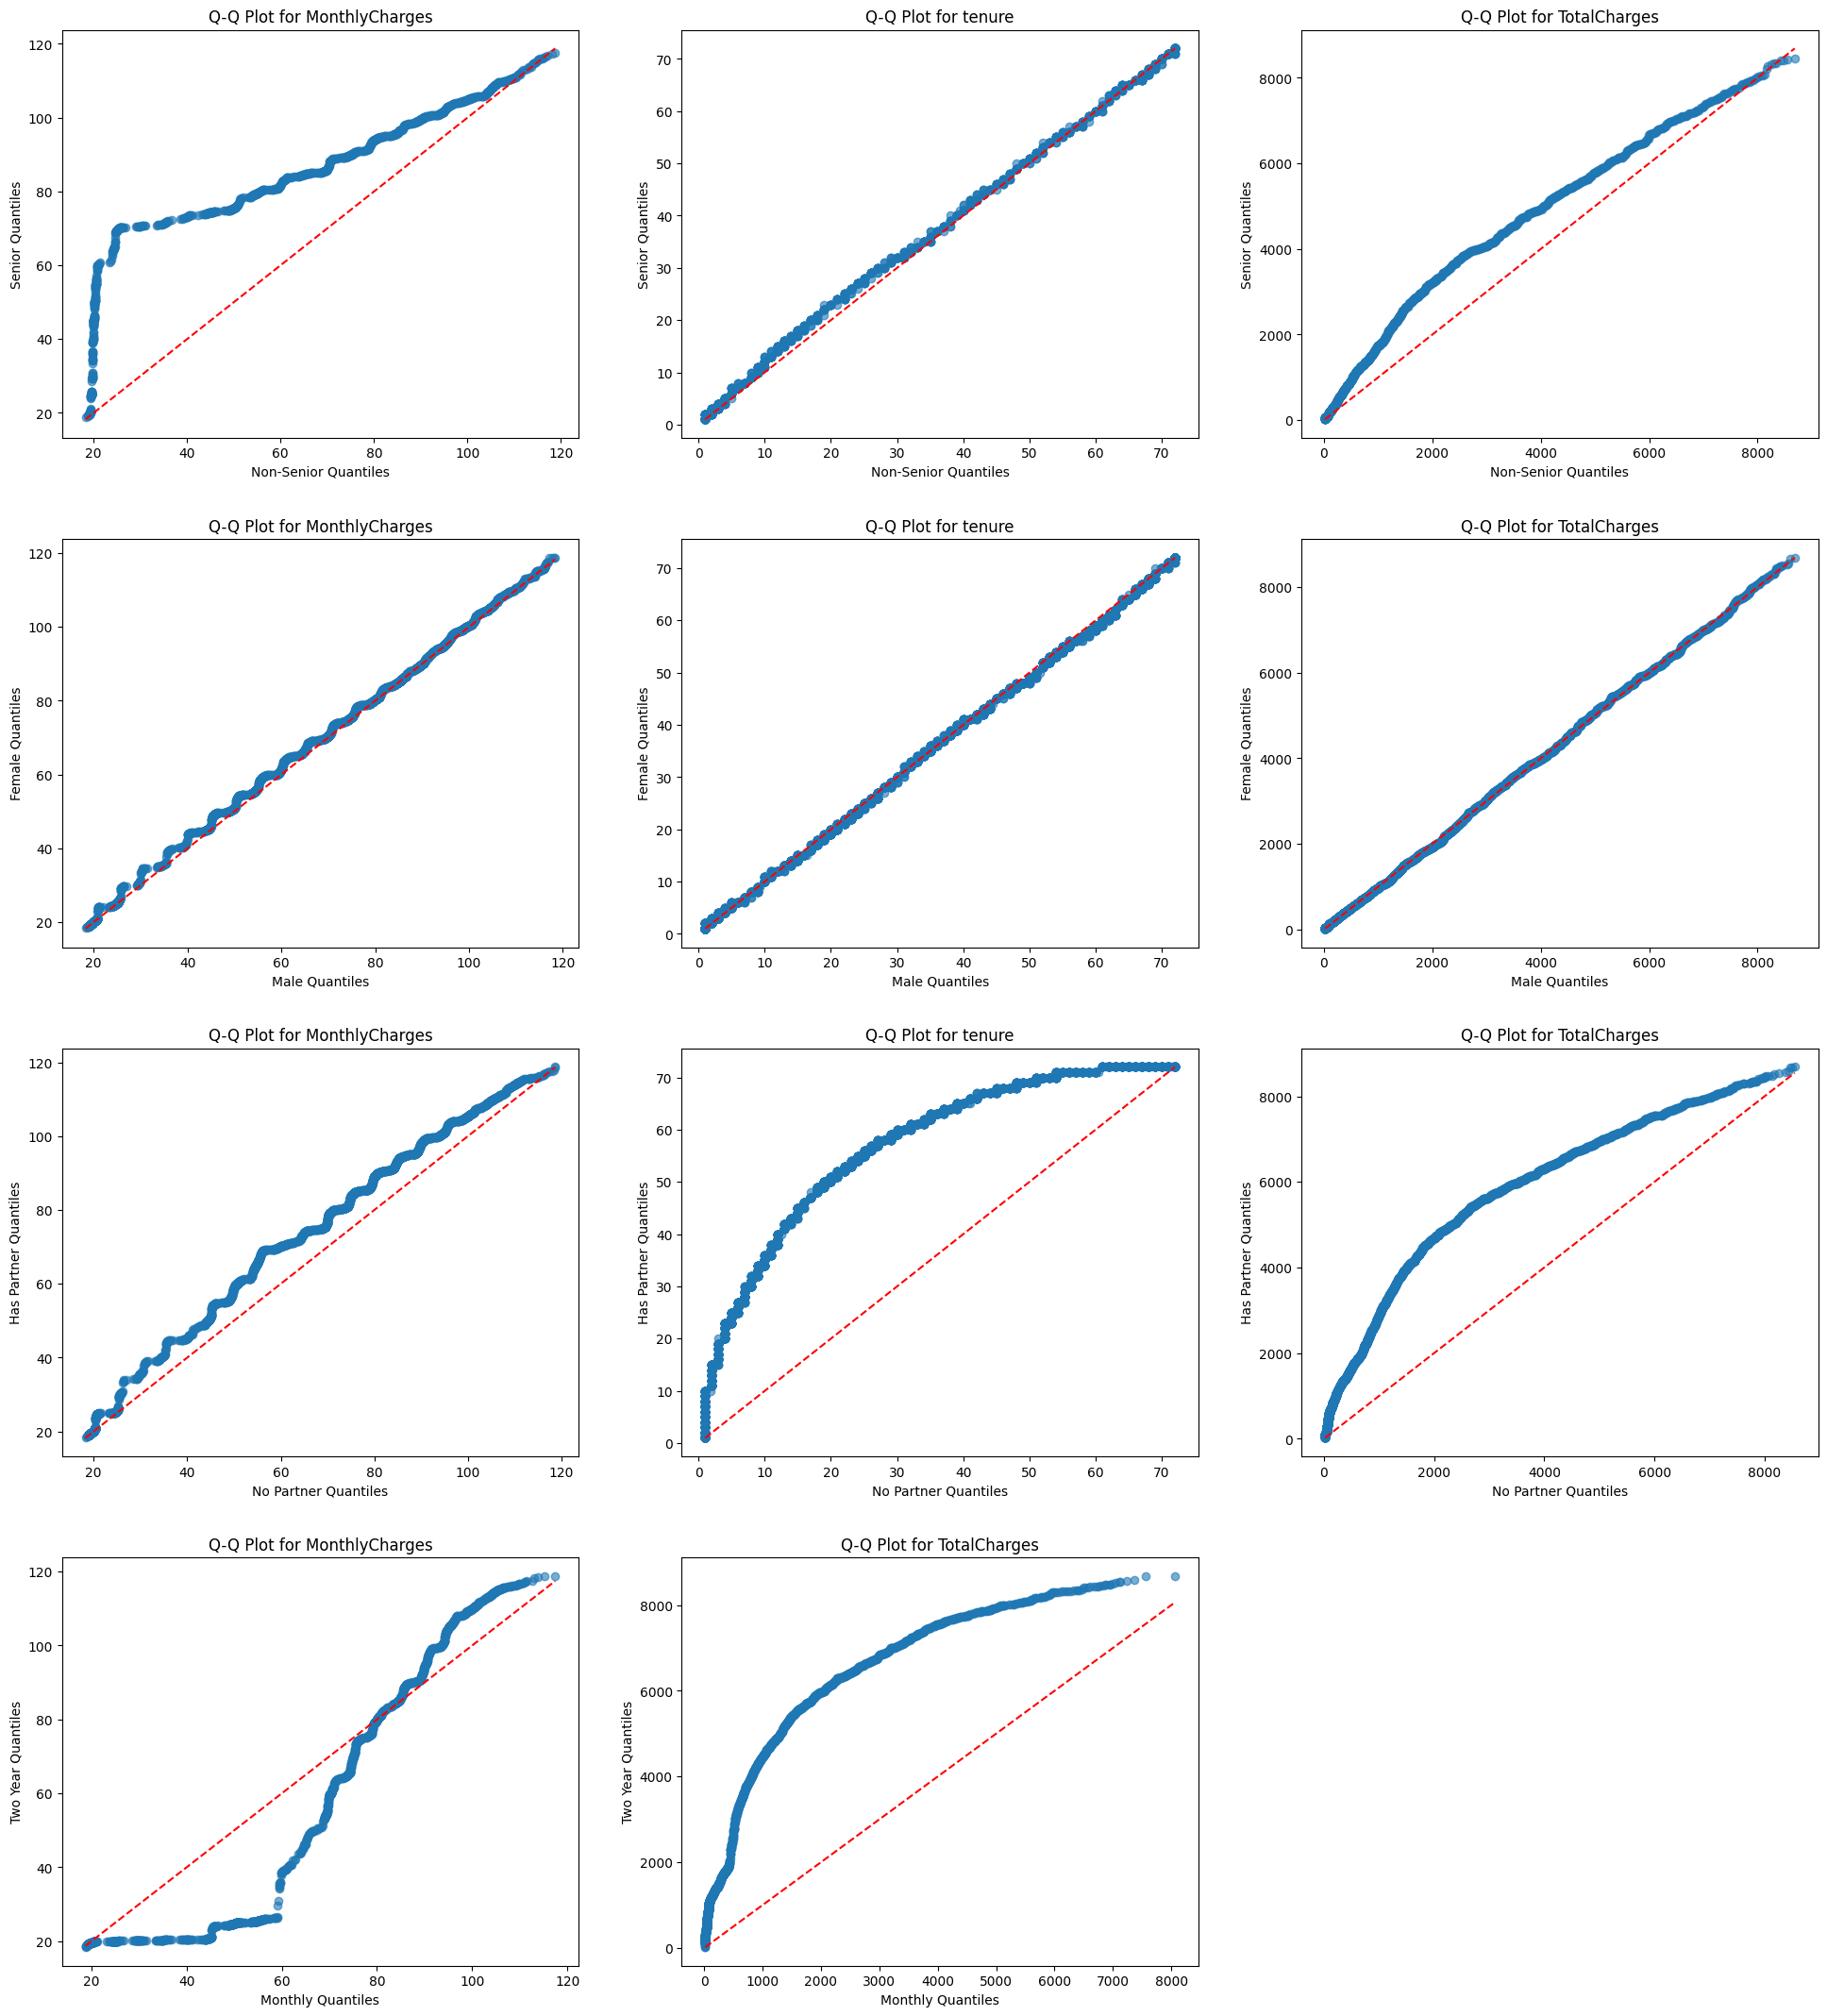

In [26]:
plot_configs = [
    {
        'group_col': 'SeniorCitizen',
        'group1': 0,
        'group2': 1,
        'num_cols': ['MonthlyCharges', 'tenure', 'TotalCharges'],
        'group1_label': 'Non-Senior', # Label for cleaner titles
        'group2_label': 'Senior'
    },
    {
        'group_col': 'gender',
        'group1': 'Male',
        'group2': 'Female',
        'num_cols': ['MonthlyCharges', 'tenure', 'TotalCharges'],
        'group1_label': 'Male',
        'group2_label': 'Female'
    },
    {
        'group_col': 'Partner',
        'group1': 'No',
        'group2': 'Yes',
        'num_cols': ['MonthlyCharges', 'tenure', 'TotalCharges'],
        'group1_label': 'No Partner',
        'group2_label': 'Has Partner'
    },
    {
        'group_col': 'Contract',
        'group1': 'Month-to-month',
        'group2': 'Two year',
        'num_cols': ['MonthlyCharges', 'TotalCharges'], # This row only has 2 plots
        'group1_label': 'Monthly',
        'group2_label': 'Two Year'
    }
]

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 22))
for i, config in enumerate(plot_configs):

    for j, num_col in enumerate(config['num_cols']):
        ax = axes[i, j]

        g1 = df[df[config['group_col']] == config['group1']][num_col].dropna()
        g2 = df[df[config['group_col']] == config['group2']][num_col].dropna()

        quantiles = np.linspace(0, 1, min(len(g1), len(g2)))
        q1 = np.quantile(g1, quantiles)
        q2 = np.quantile(g2, quantiles)

        ax.scatter(q1, q2, alpha=0.6)
        ax.plot([min(q1), max(q1)], [min(q1), max(q1)], 'r--')

        ax.set_xlabel(f"{config['group1_label']} Quantiles")
        ax.set_ylabel(f"{config['group2_label']} Quantiles")
        ax.set_title(f"Q-Q Plot for {num_col}")

axes[3, 2].axis('off')
plt.tight_layout(pad=3.0)
plt.show()

1. Senior Citizens vs. Non-Seniors:
* Monthly Charges: Senior Citizens pay significantly more per month.
*Tenure & Total Charges: Interestingly, tenure is nearly identical between the two groups. The higher TotalCharges for seniors is simply a result of their higher monthly bills, not because they stay longer.
2. Gender (Male vs. Female):
* Across MonthlyCharges, tenure, and TotalCharges, the plots show a perfect match. This means gender has no noticeable impact on the spending or loyalty habits of customers in this dataset.
3. Customers with a Partner vs. Single Customers:
*  Customers with a partner stay longer and accumulate much higher total charges. They also tend to have slightly higher monthly bills. This makes them a very valuable and loyal customer segment.
4. Contract Type (Month-to-Month vs. Two Year):
*  Customers on a Two-Year contract have vastly higher TotalCharges. This is because they pay slightly more per month and, by definition, have a much longer tenure. Contract type is a very strong predictor of a customer's total value.

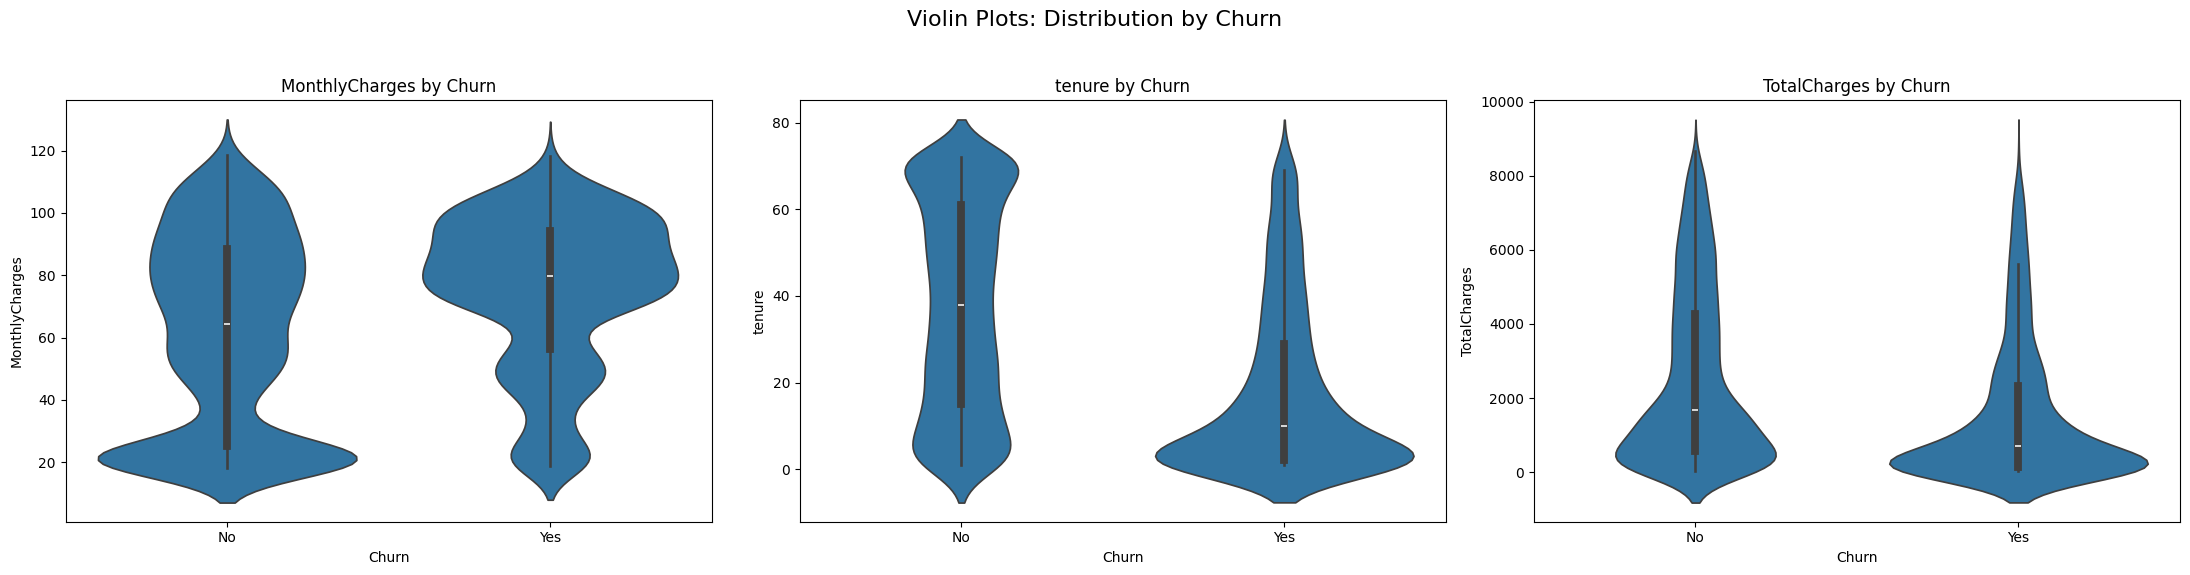

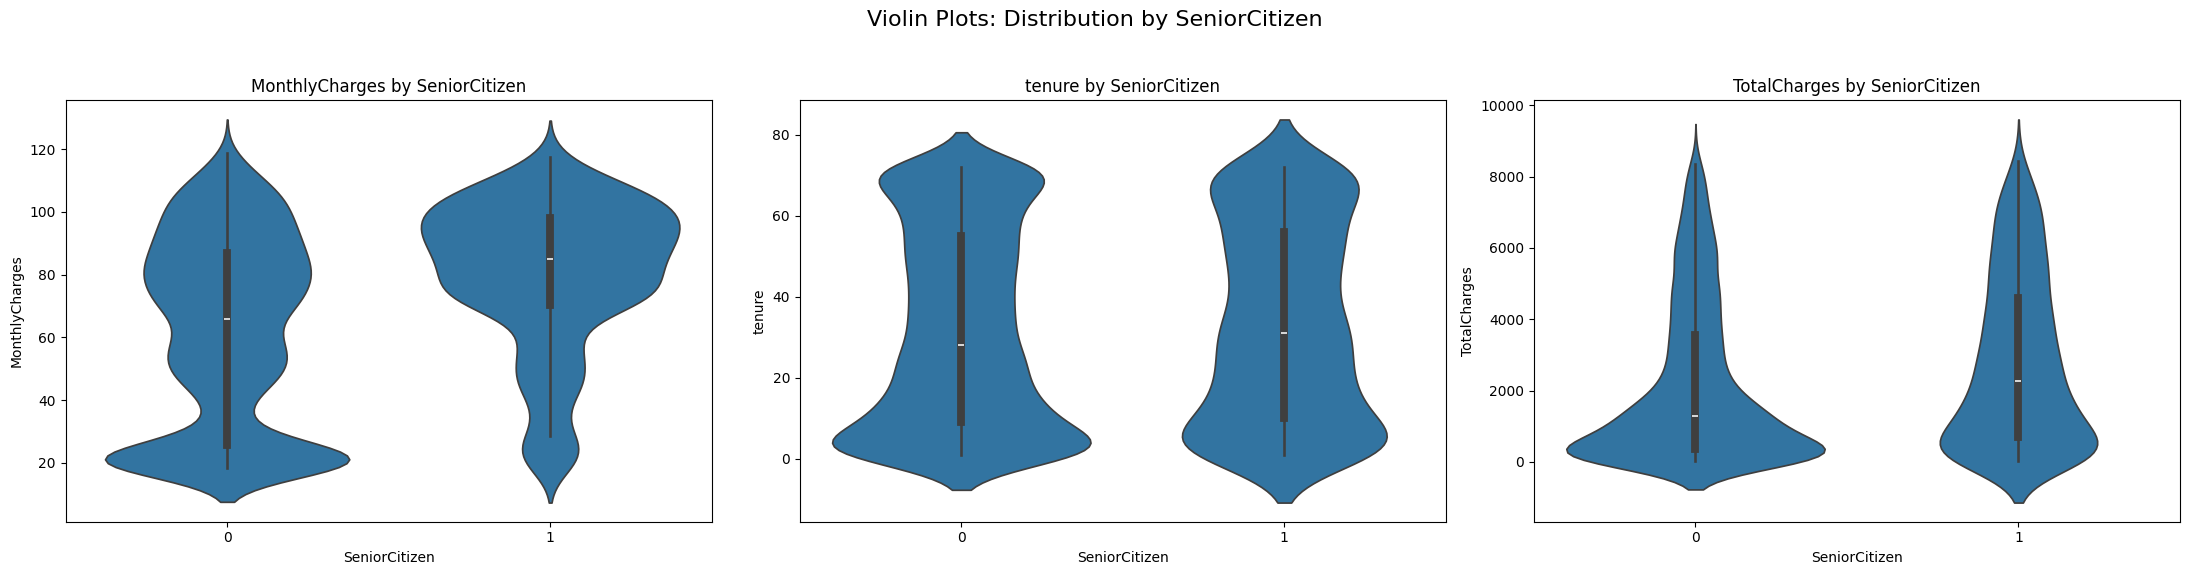

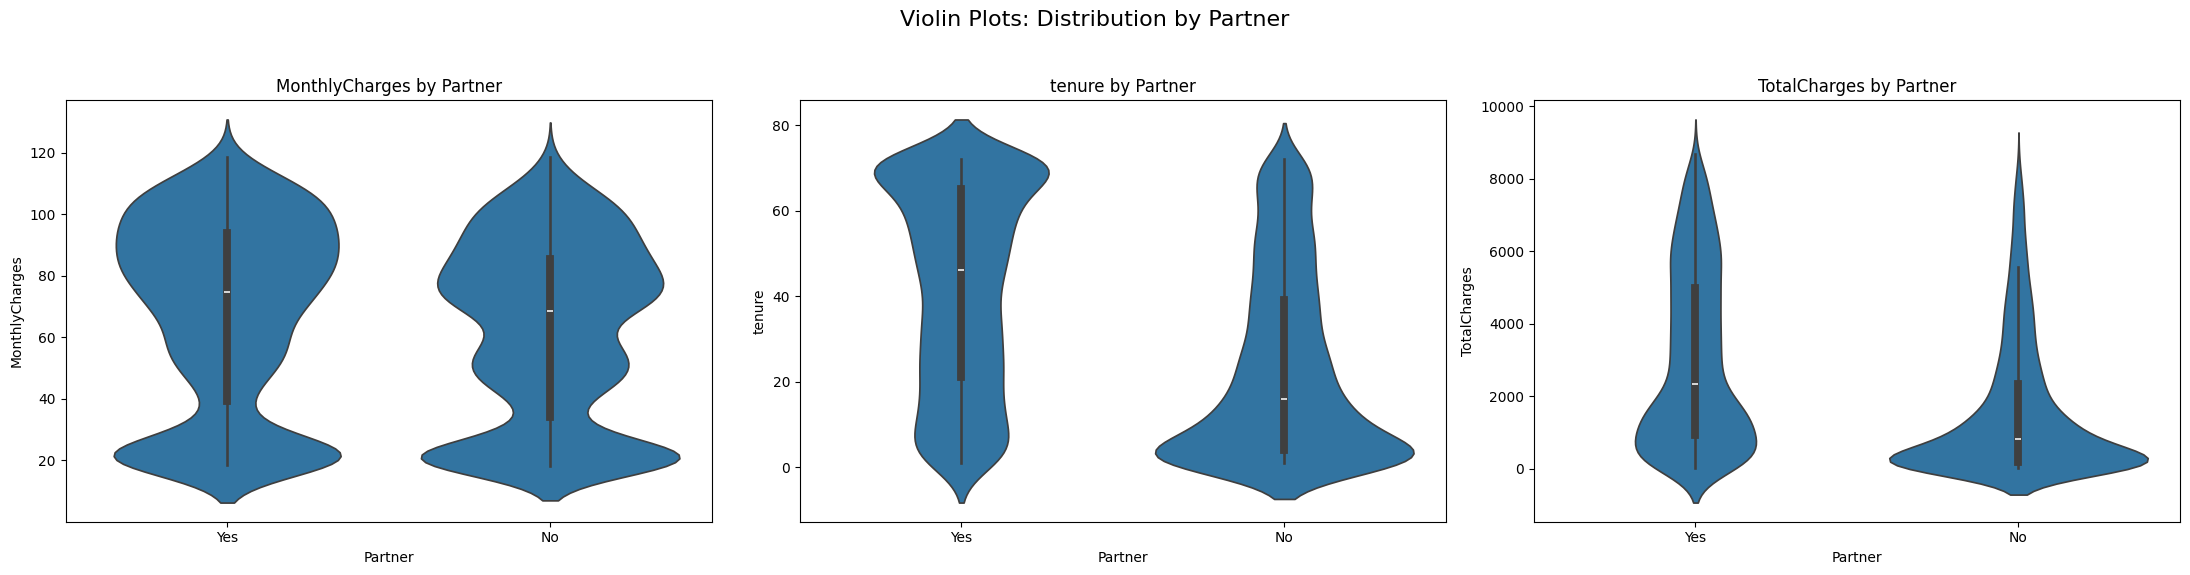

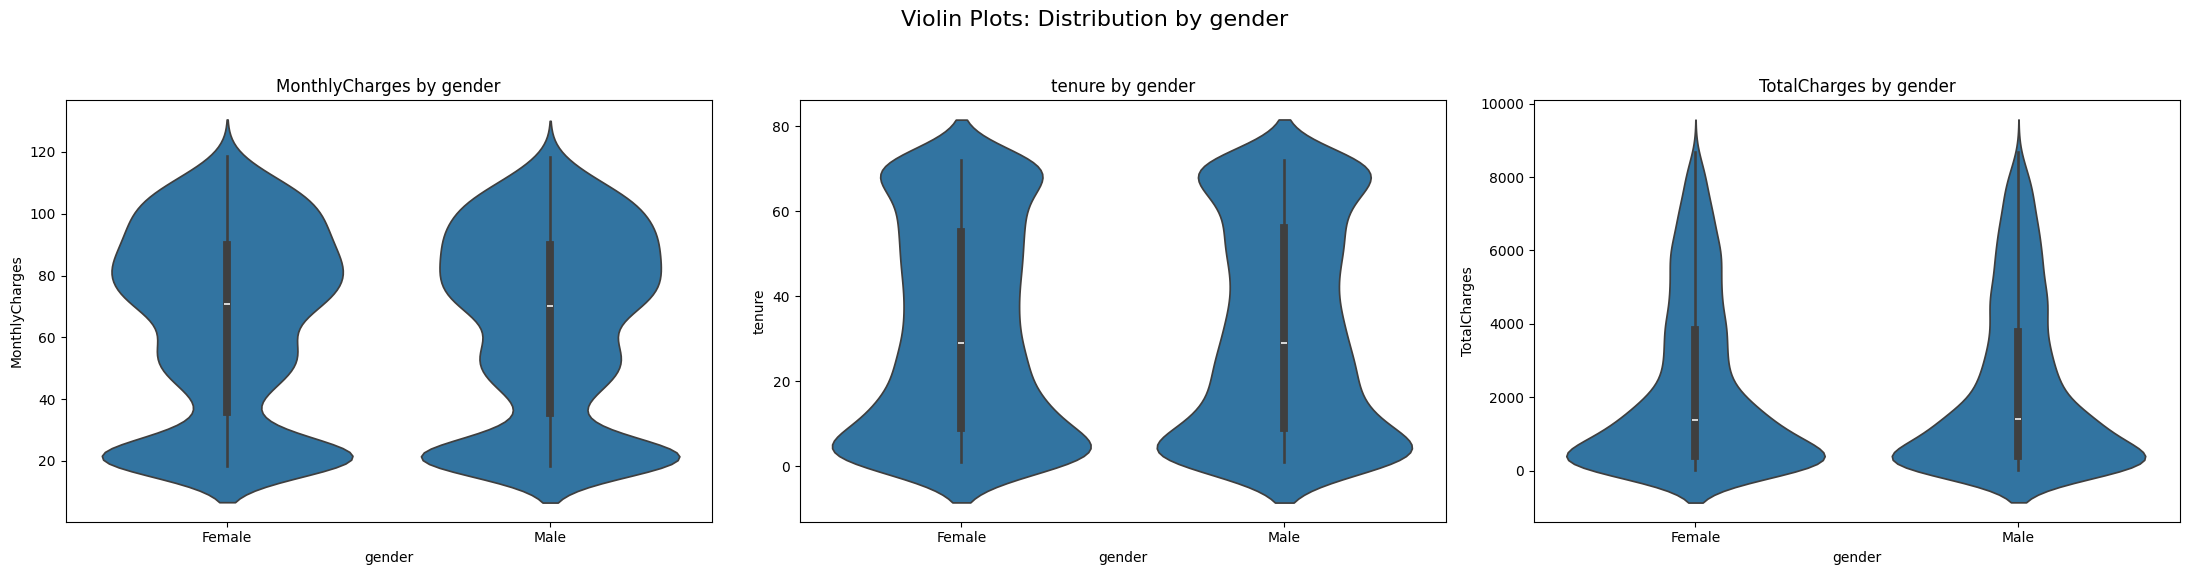

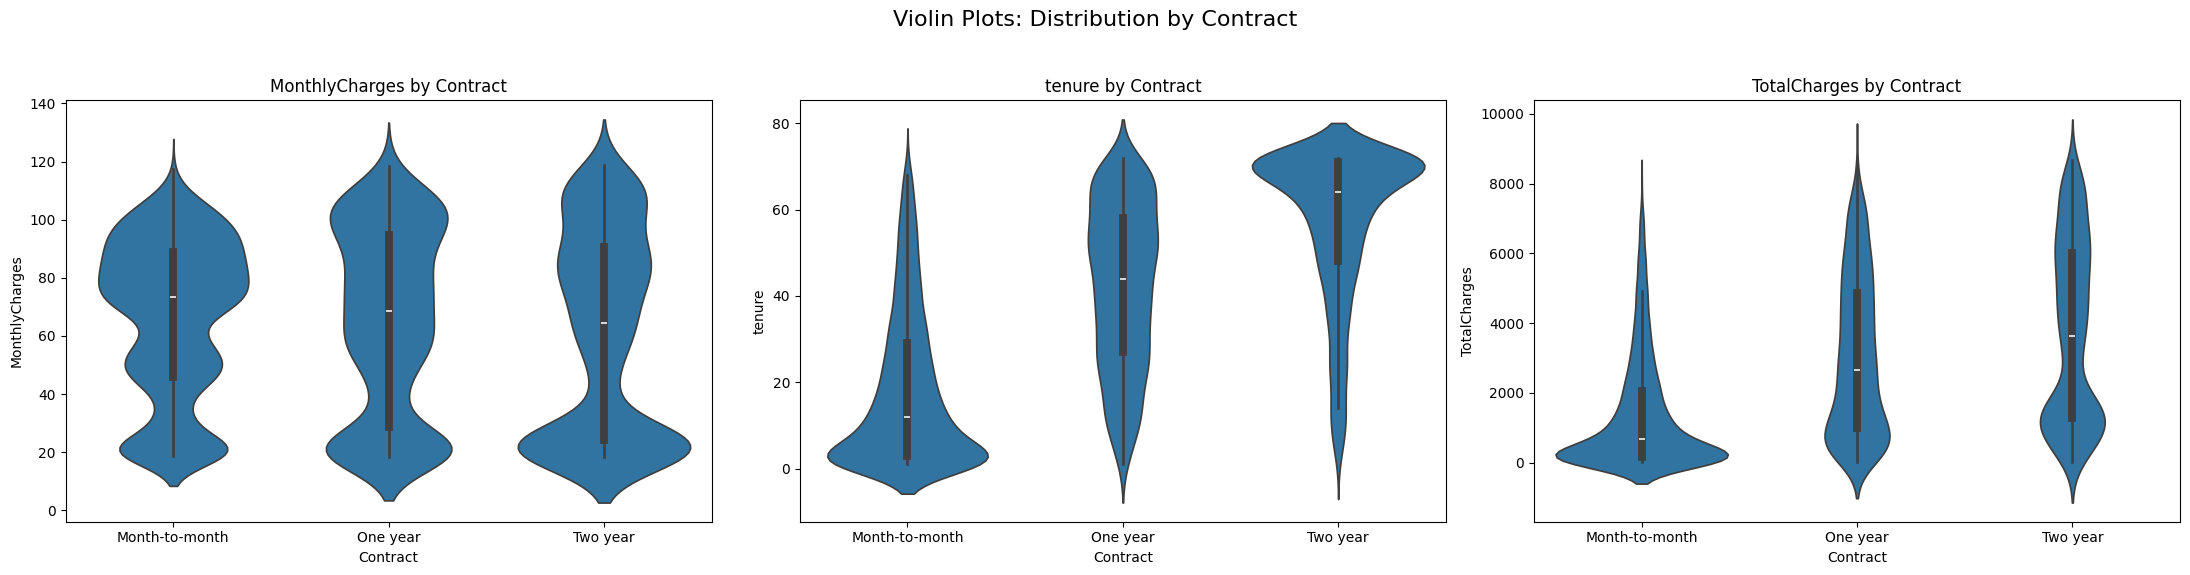

In [27]:
numerical_cols = ['MonthlyCharges', 'tenure', 'TotalCharges']
categorical_cols = ['Churn', 'SeniorCitizen', 'Partner', 'gender', 'Contract']
for cat_col in categorical_cols:

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(22, 6))
    fig.suptitle(f'Violin Plots: Distribution by {cat_col}', fontsize=16)

    for i, num_col in enumerate(numerical_cols):
        sns.violinplot(x=cat_col, y=num_col, data=df, ax=axes[i])


        axes[i].set_title(f'{num_col} by {cat_col}')


    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

 Based on Churn Status
---
* Monthly Charges: The violin for customers who churned (Churn=Yes) is clearly shifted upwards.customers with higher monthly bills are more likely to churn. Loyal customers (Churn=No) are heavily concentrated in the lower-cost plans.
* Tenure: The churned group's violin is extremely wide at the very bottom, showing that most churn happens within the first few months. The loyal customer group has two wide areas—one at the bottom (new customers) and one at the top (long-term customers).
* Total Charges: The violin for churned customers is small and packed at the bottom. Since they leave early, they simply don't have time to accumulate high total charges.

Based on Senior Citizen Status
---
* Monthly Charges: The violin for Senior Citizens is noticeably higher. This is a clear visual confirmation that seniors tend to be on more expensive plans.
* Tenure & Total Charges: The tenure distributions look quite similar, meaning seniors don't stay for longer or shorter periods than non-seniors. Their higher TotalCharges are a direct result of their higher monthly payments.

Based on Partnership Status
---
* Tenure: The violin for customers with a partner is wider in the upper half, with a higher median. This is a strong indicator that customers with a partner are more loyal and stay with the service much longer.
* Monthly & Total Charges: Customers with a partner also tend to pay slightly more per month, and due to their long tenure, they accumulate significantly higher TotalCharges over time, making them a high-value segment.

Distributions by Gender
---
* the violins for 'Male' and 'Female' are almost identicalfor all three numeric variable.

Distributions by Contract Type
---
* Tenure: Month-to-month customers are concentrated at very low tenures. One year customers are in the middle, and Two year customers are heavily concentrated at high tenures. Contract length is a powerful predictor of customer loyalty.
* Total Charges: the violins more spread out as the contract length increases. Customers on long-term contracts generate vastly more revenue over their lifetime.

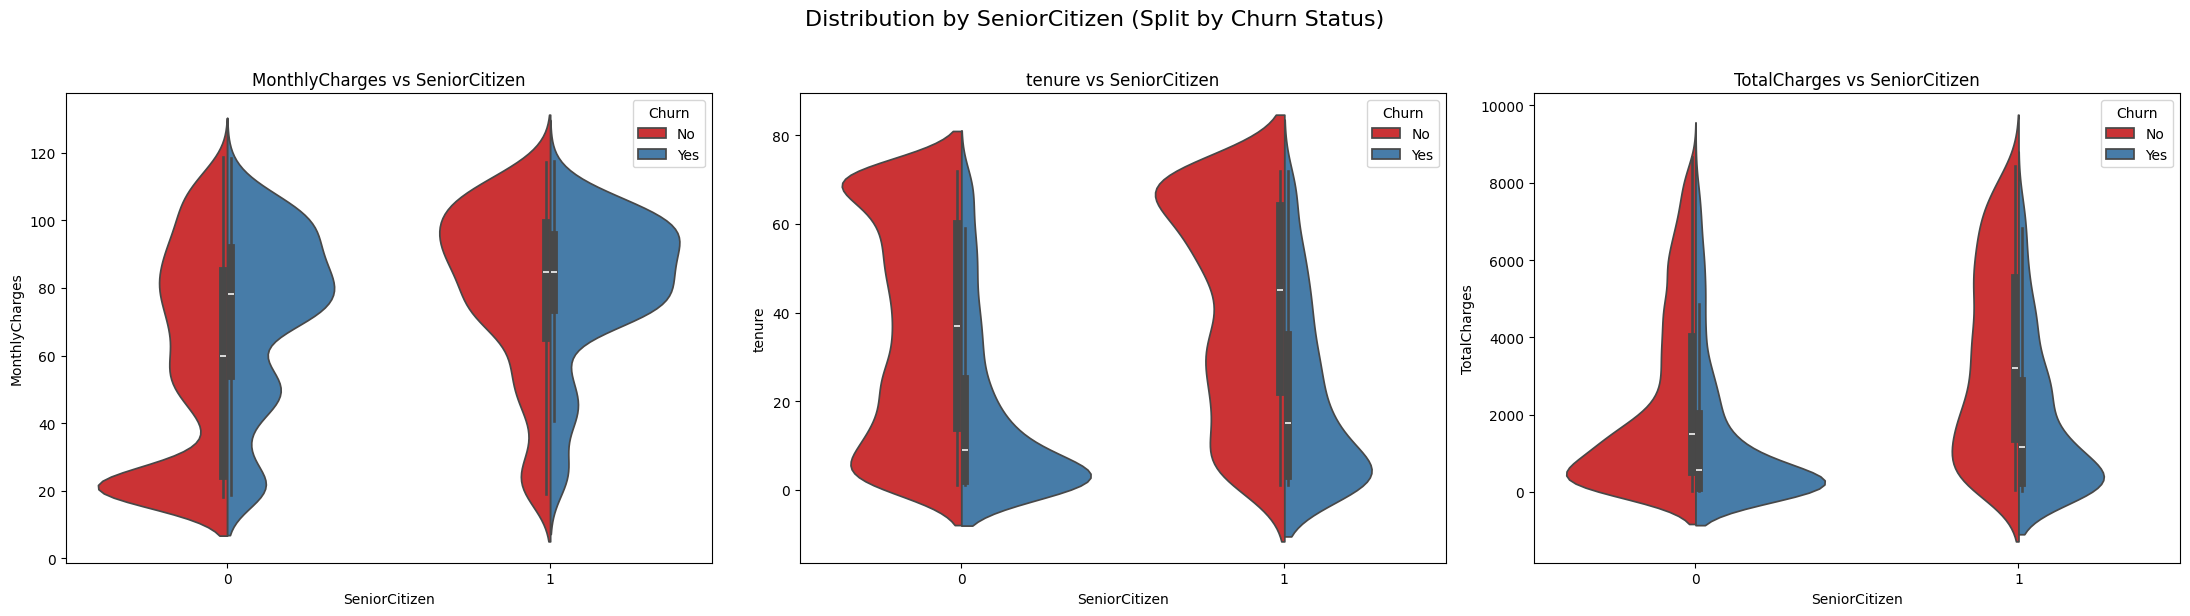

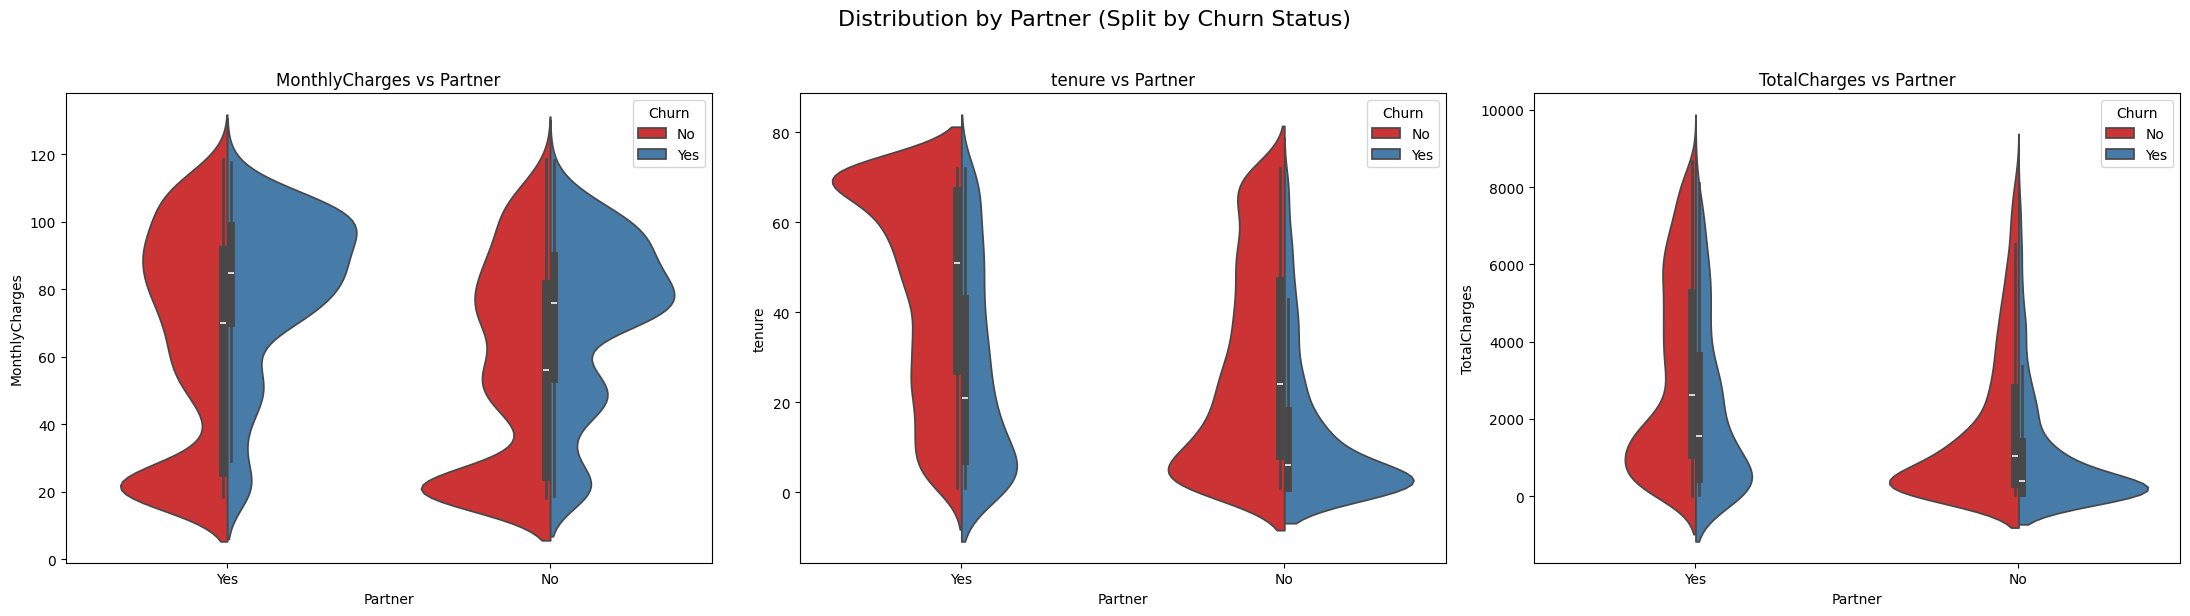

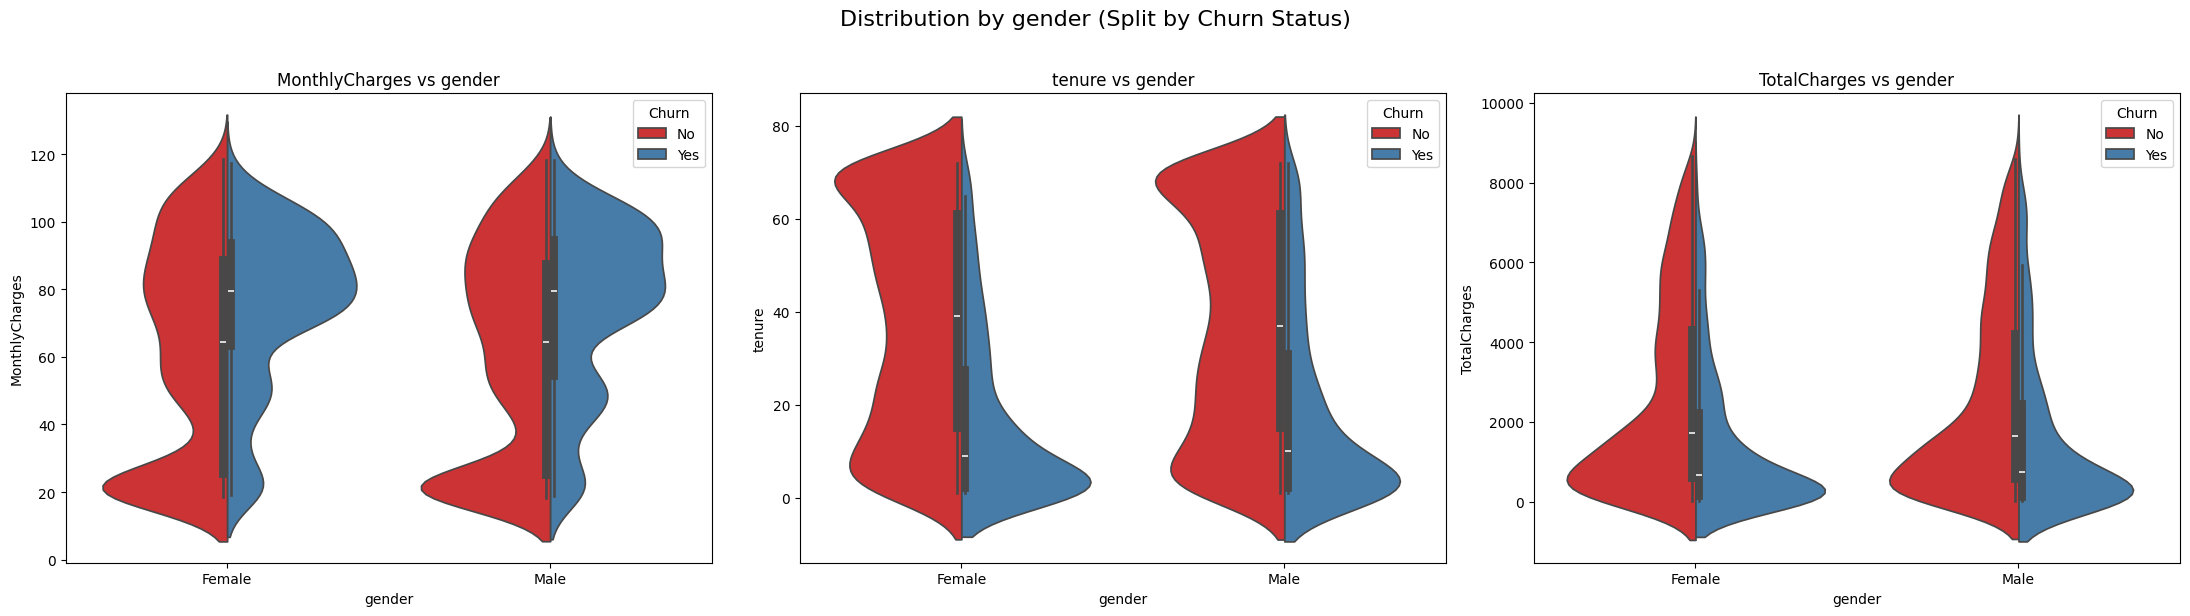

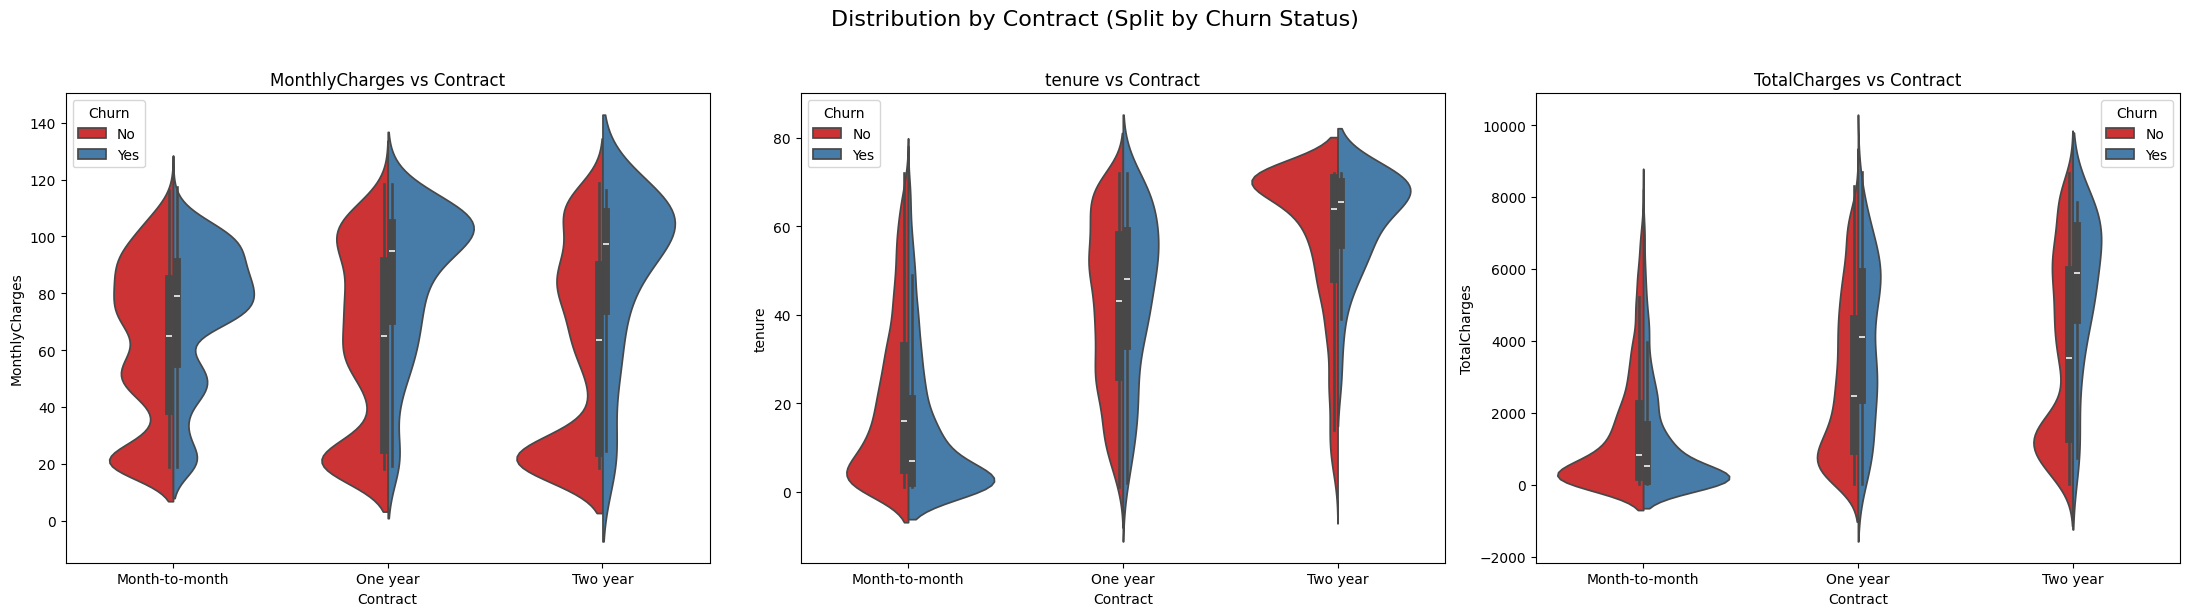

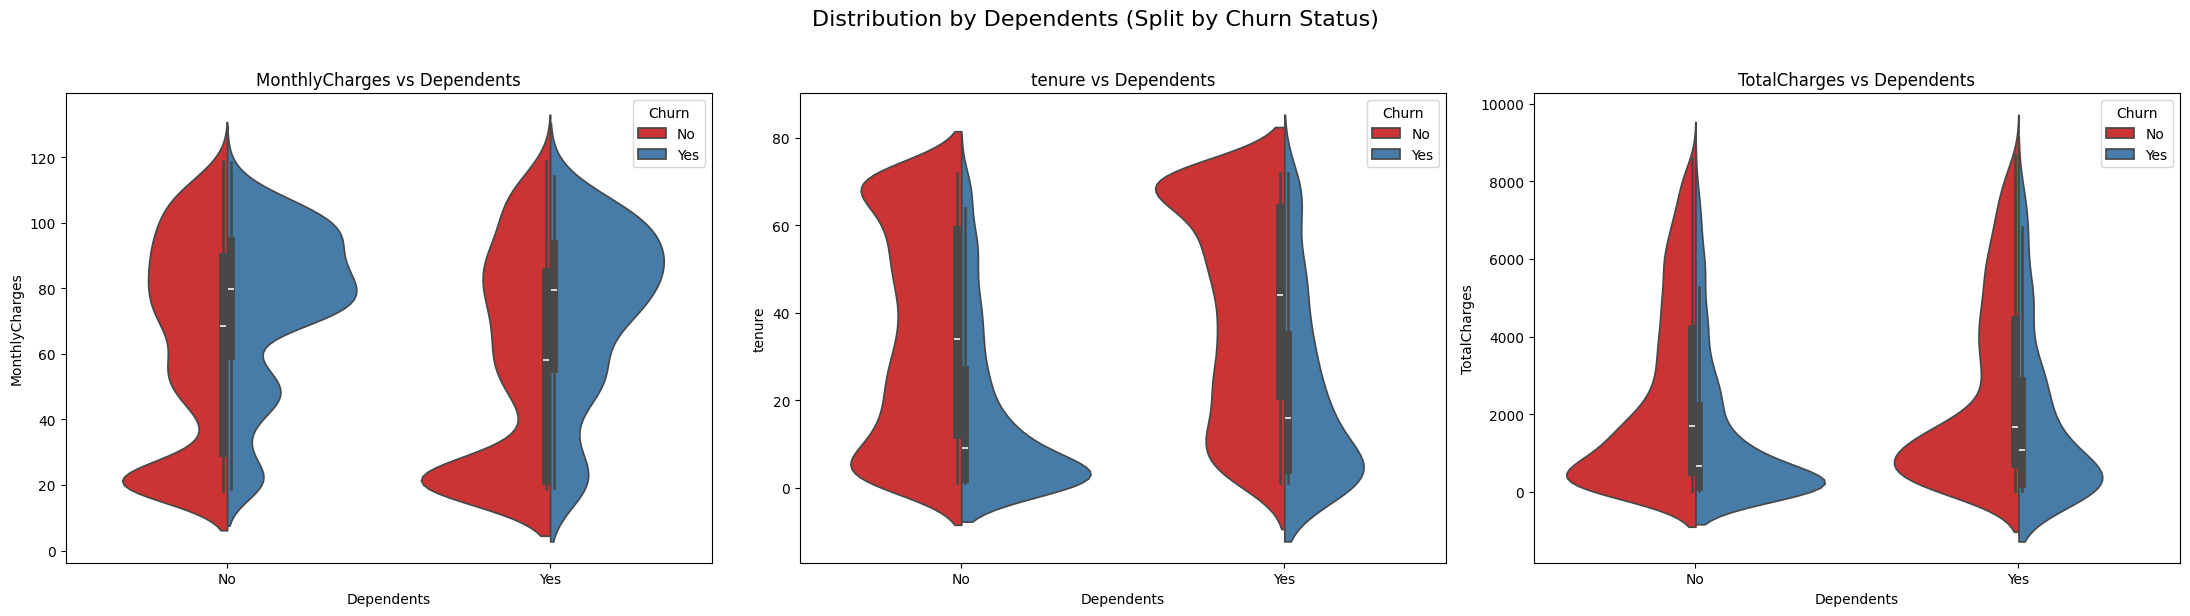

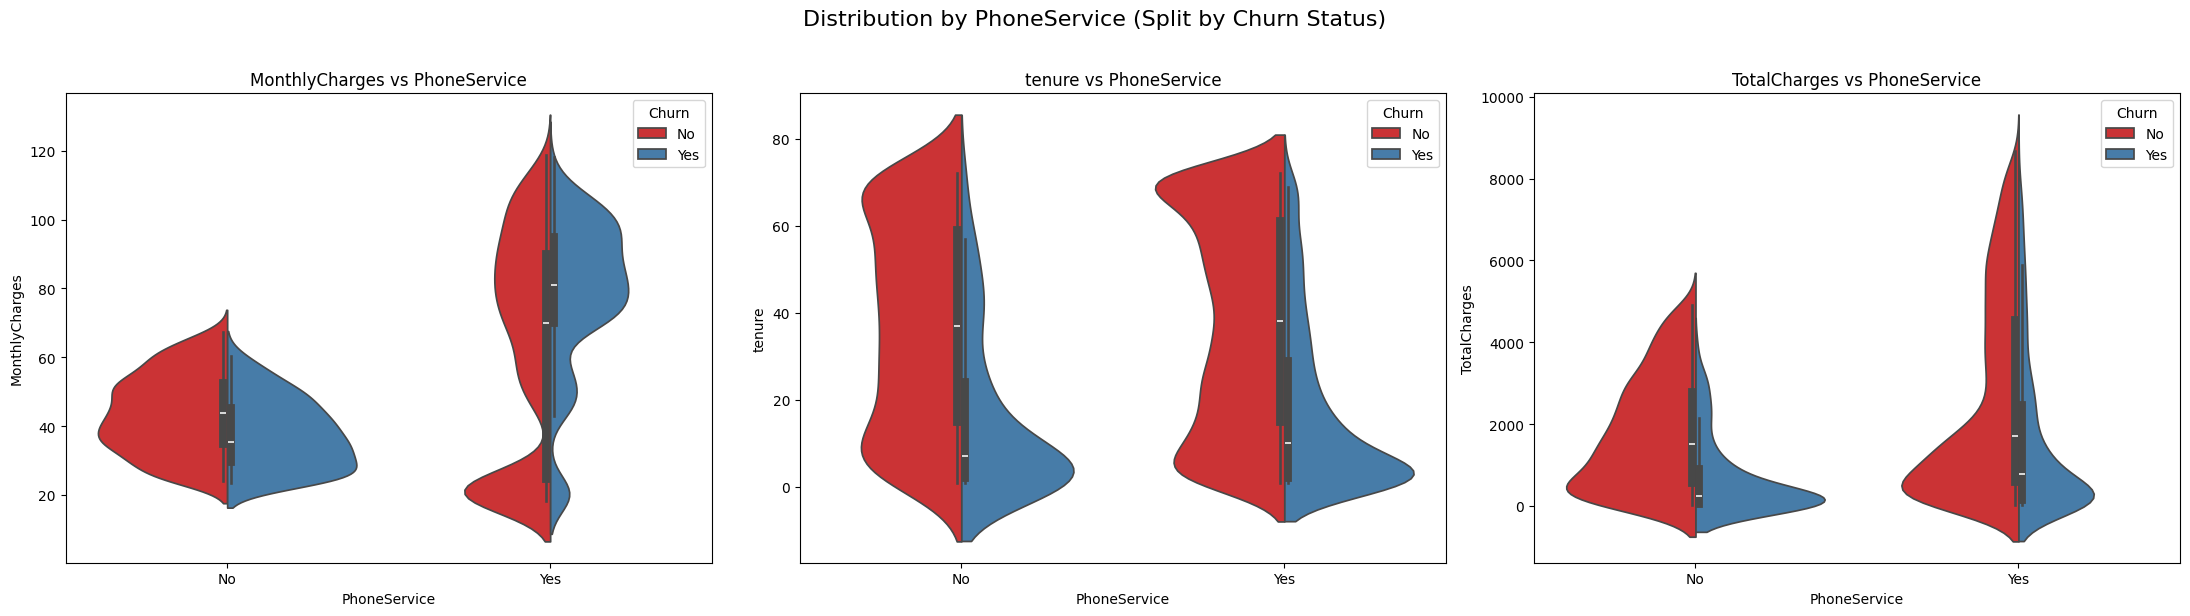

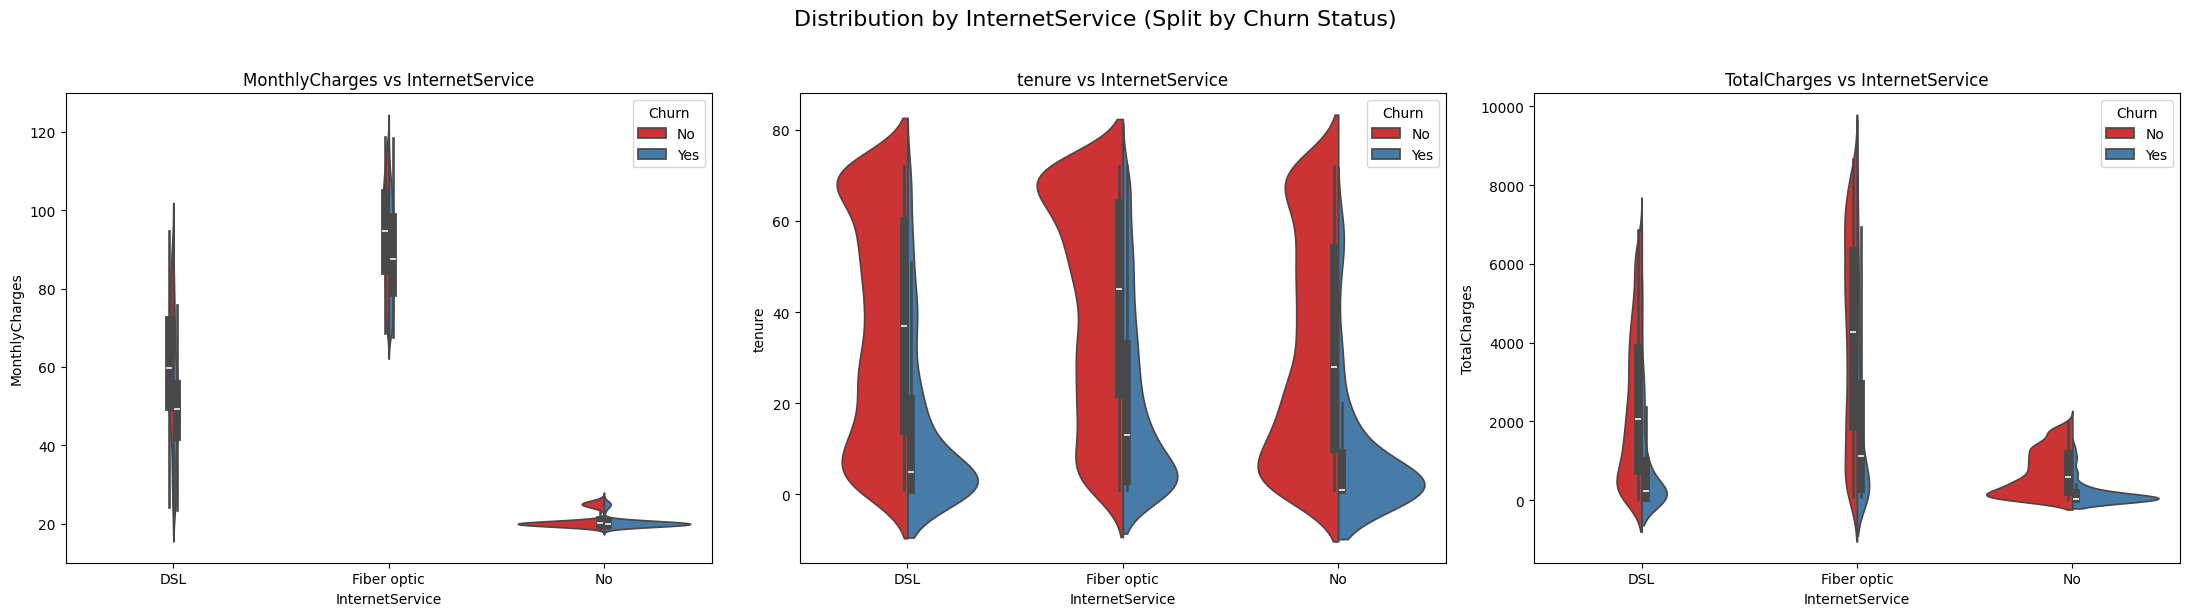

In [29]:
numerical_cols = ['MonthlyCharges', 'tenure', 'TotalCharges']
categorical_cols_for_x = ['SeniorCitizen', 'Partner', 'gender', 'Contract', 'Dependents', 'PhoneService', 'InternetService']

for cat_col in categorical_cols_for_x:

    fig, axes = plt.subplots(nrows=1, ncols=len(numerical_cols), figsize=(22, 6))
    fig.suptitle(f'Distribution by {cat_col} (Split by Churn Status)', fontsize=16, y=1.02)
    for i, num_col in enumerate(numerical_cols):

        sns.violinplot(x=cat_col, y=num_col, data=df, hue='Churn', split=True, palette='Set1', ax=axes[i])
        axes[i].set_title(f'{num_col} vs {cat_col}')

    plt.tight_layout()
    plt.show()

Analysis by Senior Citizen Status
---
*Monthly Charges: For both Seniors and Non-Seniors, the story is the same: the "churn" half of the violin is wider at the top. This confirms that high monthly cost is a driver for churn regardless of age.
*Tenure: The pattern of early churn is also consistent across both groups. The "churn" half is heavily concentrated at the bottom for both Seniors and Non-Seniors, meaning new customers are at high risk of leaving, regardless of age.

Analysis by Partnership Status
---
* Tenure: The impact of early churn is much more pronounced for single customers (Partner=No). Their "churn" violin is significantly larger at the low-tenure end compared to customers with a partner. This suggests that single customers are not only more likely to churn, but they do so very quickly.
* Monthly Charges: While customers with partners generally have higher charges, the churn pattern is similar: those who leave tend to be the ones with higher bills within their group.
Analysis by Gender
* Conclusion: The split violins for Male and Female customers are nearly identical across all metrics. This reinforces our earlier finding: gender does not play a significant role in churn behavior or spending habits.

Analysis by Contract Type (Key Insight!)
---
* Tenure: For Month-to-month contracts, the "churn" half of the violin is massive and almost entirely at the bottom (low tenure). For Two year contracts, the "churn" half is practically non-existent. This provides a powerful visual confirmation: Month-to-month contracts are extremely high-risk for early churn, while Two-year contracts are very secure.
* Monthly Charges: For Month-to-month customers, churn is strongly associated with higher monthly bills. For Two year contracts, churn is so rare that it's not strongly associated with any price point.

Analysis by Dependents
---
* Conclusion: The pattern here is very similar to that of Partner. Customers with no dependents are more likely to churn, and they do so earlier. Having dependents appears to be a factor that increases customer loyalty and retention.

Analysis by Phone Service
---

* Conclusion: There is no significant difference in churn behavior between customers who have phone service and those who don't. The shapes of the split violins are very similar for both groups.

Analysis by Internet Service
---

* Monthly Charges: The churn story is different for each service type. For Fiber optic customers, who have the highest monthly bills, the "churn" half is very wide in the upper range, indicating high price is a major reason for churn in this group. For DSL customers, the effect is less pronounced. Customers with no internet service have very low churn.
* Tenure: The problem of early churn is most severe among Fiber optic customers. This suggests that customers may be lured in by promotional offers for high-speed internet but then leave quickly, possibly due to the high post-promotion price or service issues.